First Practical Project - MINDD
-----
-----

Authors:
--------
Ana Rita Silva - 1211152

Jorge Cruz - 1221715


-----

This project aims to develop predictive models to estimate the success of bank's telemarketing campaigns using data mining techniques. Based on a dataset collected by retail bank between 2008-2013, the CRISP-DM methodology was applied to understand, prepare, model and evaluate the data, identifying factors that influence customer subscription and supporting strategic decisions in the future campaigns

# 1. Data Presentation and Exploratory Analysis

In this first chapter, the dataset used in this project is presented, followed by a detailed exploratory analysis aimed at understanding the structure, characteristics and potential patterns relevant to the modeling phase.


#### Imports of the libraries
 - Data handling & analysis: NumPy, Pandas

 - ata visualization: MAtplotlib, Seaborn

 - Notebook display: IPython.display (MArkdown, display)

 - Data preprocessing: StandardScaler, LabelEncoder

 - Model selection and validation: train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_validate

 - Machine learning models: LinearRegression, LogisticRegression, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, KNeighborsClassifier, DecisionTreeClassifier, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, GaussianNB, LGBMClassifier

 - Model evaluation: classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay, make_scorer

 - Miscellaneous: warnings (to suppress unnecessary warnings)


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier   # optional
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score, roc_auc_score, make_scorer,ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

 ##### Loading the dataset

In [25]:
df = pd.read_csv('bank.csv', delimiter=";")
df

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

##### First 5 rows of the dataset

In [26]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

##### Last 5 rows of the dataset

In [27]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

##### Shape and size of the dataset

In [28]:
shape = df.shape
size = df.size
print('Number of rows: ', shape[0])
print('Number of columns: ', shape[1])
print('Size of the dataset: ', size)

Number of rows:  41188
Number of columns:  21
Size of the dataset:  864948


##### Number of columns

In [29]:
len(df.columns)

21

##### Separation of the features into two lists (categorical and numerical)

In [30]:
all_columns = df.columns
goal_attribute = 'y'
predictors = all_columns.drop(goal_attribute)

categorical_predictors = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numeric_predictors = predictors.drop(categorical_predictors)

print('Predictors:', list(predictors))
print()
print('Categorical Predictors:', list(categorical_predictors))
print()
print('Numeric Predictors:', list(numeric_predictors))

Predictors: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Predictors: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

Numeric Predictors: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


##### Checking de types of the columns

In [31]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

The dataset contains a variety of variable types. There are **categorical variables** ('job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y') describing costumer and contact characteristics. **Integer variables** ('age', 'duration', 'campaign', 'pdays', 'previous') representing counts and measurements. And also **continous variables** ('emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'), associated to econimic indicators.   

##### Dropping duplicated rows

In [32]:
df.drop_duplicates()

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41176 rows x 21 columns]

12 rows were removed from de Dataset, meaning they were duplicated.

##### Target Variable

In [33]:
y_counts = df['y'].value_counts()
y_percentage = df['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

y_var_dataframe

Count  Percentage
y                     
no   36548   88.734583
yes   4640   11.265417

The target variable 'y' is highly imbalanced, with 88.7% of instances labeled 'no' and 11.3% labeled 'yes'. This significant class imbalanced may reduce the performance of the model.

##### Visualization of the data

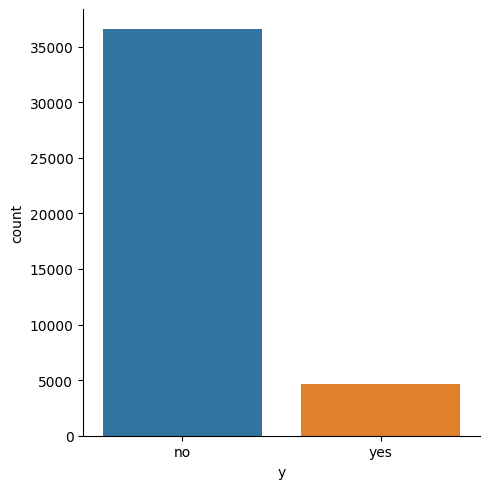

In [34]:
sns.catplot(x="y", hue="y", kind="count", data=df, legend=False)
plt.show()

-----
#### Descriptive statistics
-----


##### For numeric predictors

In [35]:
df.describe(include=['float64', 'int64'])

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

The descriptive ananlysis of the **numerical variables** provided key insights into the data distribution and characteristics:

- *Count:* All numeric variables have 41188 observations.

- *Mean:* The average age is around 40 years and the mean contact duration is 258 seconds. On average, each client was contacted 3 times.

- *Standard deviation:* Variables such as 'duration' (std = 259.27) and 'pdays' (std = 186.91), show highly variability, suggesting significant dispersion in the values.

- *Min and Max:* Wide ranges are observed in age (min = 17, max = 98) and duration (min = 0, max = 4918), indicating potential outliers.

- *Quartiles (25%, 50%, 75%):* The median duration is 180 seconds, and 75% of the clients are 47 years old, showing a concentration of adults.


##### For categoric predictors

In [36]:
df.describe(include=['object'])

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

The descriptive analysis of the **categorical variables** shows the diversity and frequency of categories in the dataset:

- *Count:* All categoric varibales contain 41188 observations.

- *Unique:* The number of unique categories varies, with 'job' having 12 categories and 'y' 2 categories ('yes' and 'no').

- *Most frequent values:* The most common categories are 'admin' for 'job' (10422 records), 'married' for 'marital' (24928 records), 'university.degree' for education (12168 records), 'cellular' for 'contact' (26144 records), 'may' for 'month' (13769 records) and 'thursday' for 'day_of_week' (8623 records). Most of the clients have 'no' 'default', 'housing' = 'yes' and 'loan' = 'no'.

With this values it is possible to conclude that the majority of the contacts were made by 'cellular', mainly in 'may' and on 'thursdays', while most previous campaigns had 'nonexistent' outcome. The target 'y' is dominated by 'no' responses, meaning that most of the clients did not subscribed for a term deposit.


-----
#### Univariate Variables
-----

##### For numeric predictors

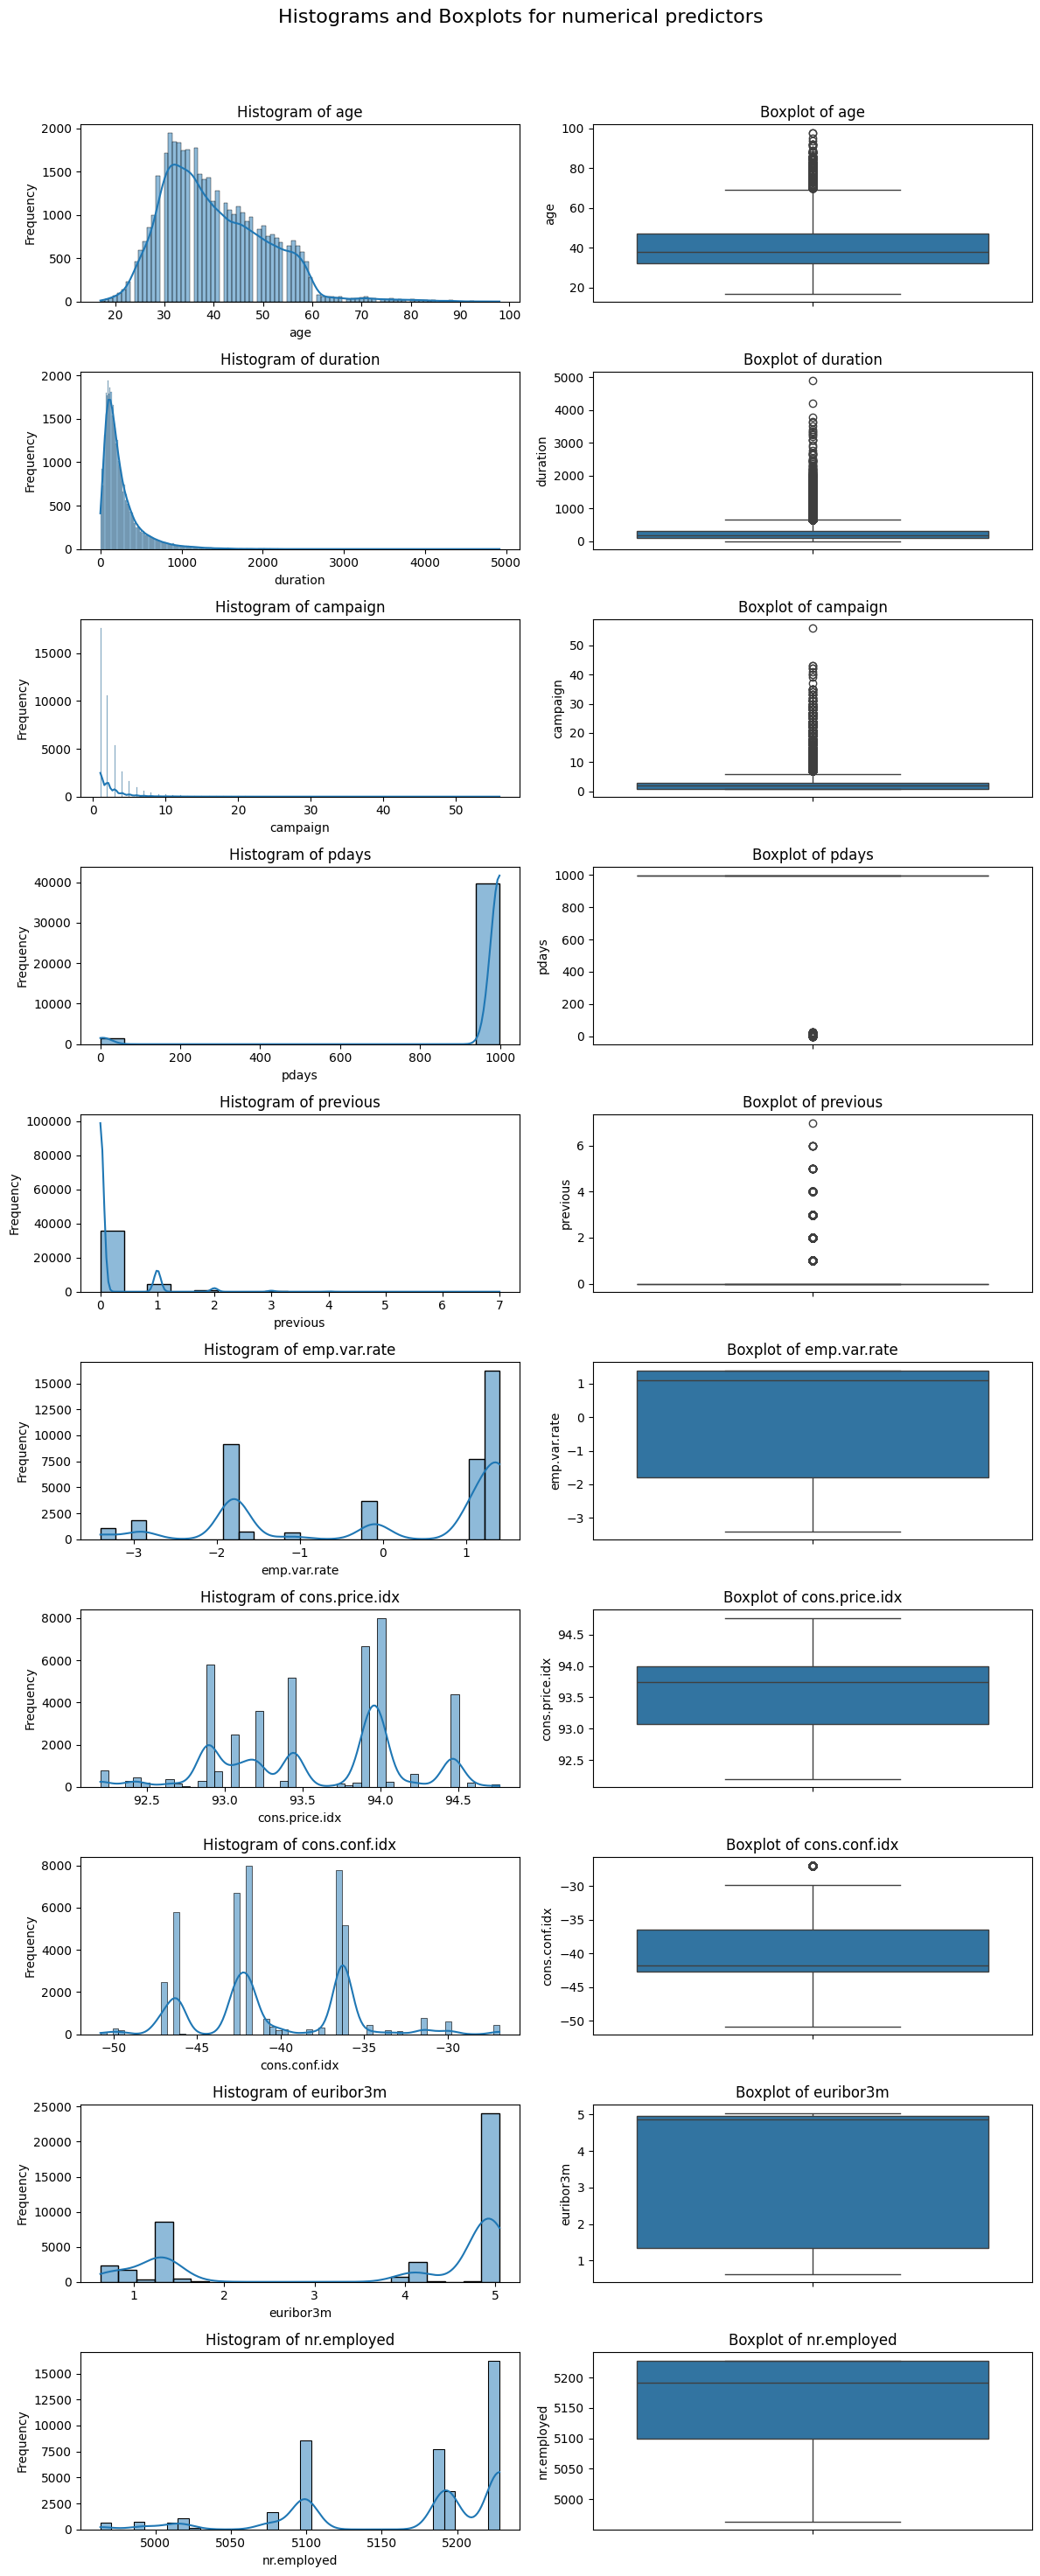

In [37]:
fig, axe = plt.subplots(nrows = len(numeric_predictors), ncols = 2, figsize = (12, 3*len(numeric_predictors)))
fig.suptitle('Histograms and Boxplots for numerical predictors', fontsize=16)

for i, column in enumerate(numeric_predictors):
    sns.histplot(df[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

The graphs ilustrate the distribution of the **numerical predictors**:

1. **Age:** The histogram shows that most of the clients have ages between 30 and 40 years old. The boxplot confirms the pattern, displaying a median age around 36-38 years and several outliers above 60, representing older clients.

2. **Duration:** The histogram shows a right-skewed distribution, where most of the last calls have a small *duration*. Tha boxplot confirms this pattern, with a low median and numerous outliers representing long calls. While most of the calls are brief, there are a small number of calls that extend in duration.

3. **Campaing:** The histogram indicates that most of the clients were contacted only once or twice during a campaign, while a very small number experienced many contact attempets. The boxplot represents a low median and the presence of numerous outliers, representing clients who were contacted an unusually number of times.

4. **Pdays:** The histogram shows an extreme peak of 999, confirming that most clients had not been previosly contacted (0 days after the client was last contacted because he was never contacted previously). Very few observations fall bellow this value, representing clients who were reached out in earlier campaigns. The boxplot represents that, with nearly all data concentrated at the upper limit (999) and a few low outliers for clients previously contacted, indicating prior contacts are rare.

5. **Previous:** The histogram indicates thar most clients had no prior contact (value = 0), while a smaller group had been contacted once or twice. Also, the boxplot can prove that, once the median is very low and the outliers are present, corresponding to clients who had multiple past contacts. Overall this suggests that the majority of the clients were approached for the first time in the current campaign.

6. **emp.var.rate:** The graphs reflects quarterly changes in employment. The histogram reveals clear peaks around -2 and 1, indicating different economic periods of contraction. The boxplot has a median slightly above 1 and minimum values near to -3.5.

7. **cons.price.idx:** The distribution is highly concentrated between 92.5 and 94.5, showing several peaks that reflect different time periods. The boxplot reveals low variability, with a median around 93.8 and a few outliers on both ends (slightly lower: 92.1/92.3 and higher: 94.7/94.8).

8. **cons.conf.idx:** The variable contains negative values, as expected for confidence indicators. The histogram has concentrations around -43 and -36. The boxplot shows a median near to -41 and a few higher outliers (less negative, around -28/-29).

9. **euribor3m:** The histogram displays a clearly bimodal pattern with one group around 1.3 and another near to 5.0, representing different macroeconomic periods. The boxplot confirms high variability, ranging between 0.7 to 5.1, with a median around 4.8/4.9.

10. **nr.employed:** The histogram indicates several different peaks between 5000 ane 5220, reflecting data from different quartes with varying employment levels. Most observations are concentrated around 5200, suggesting periods of higher employment. The boxplot confirms limited variability and no significant outliers, with a median around 5190 and 5195

##### For categorical predictors

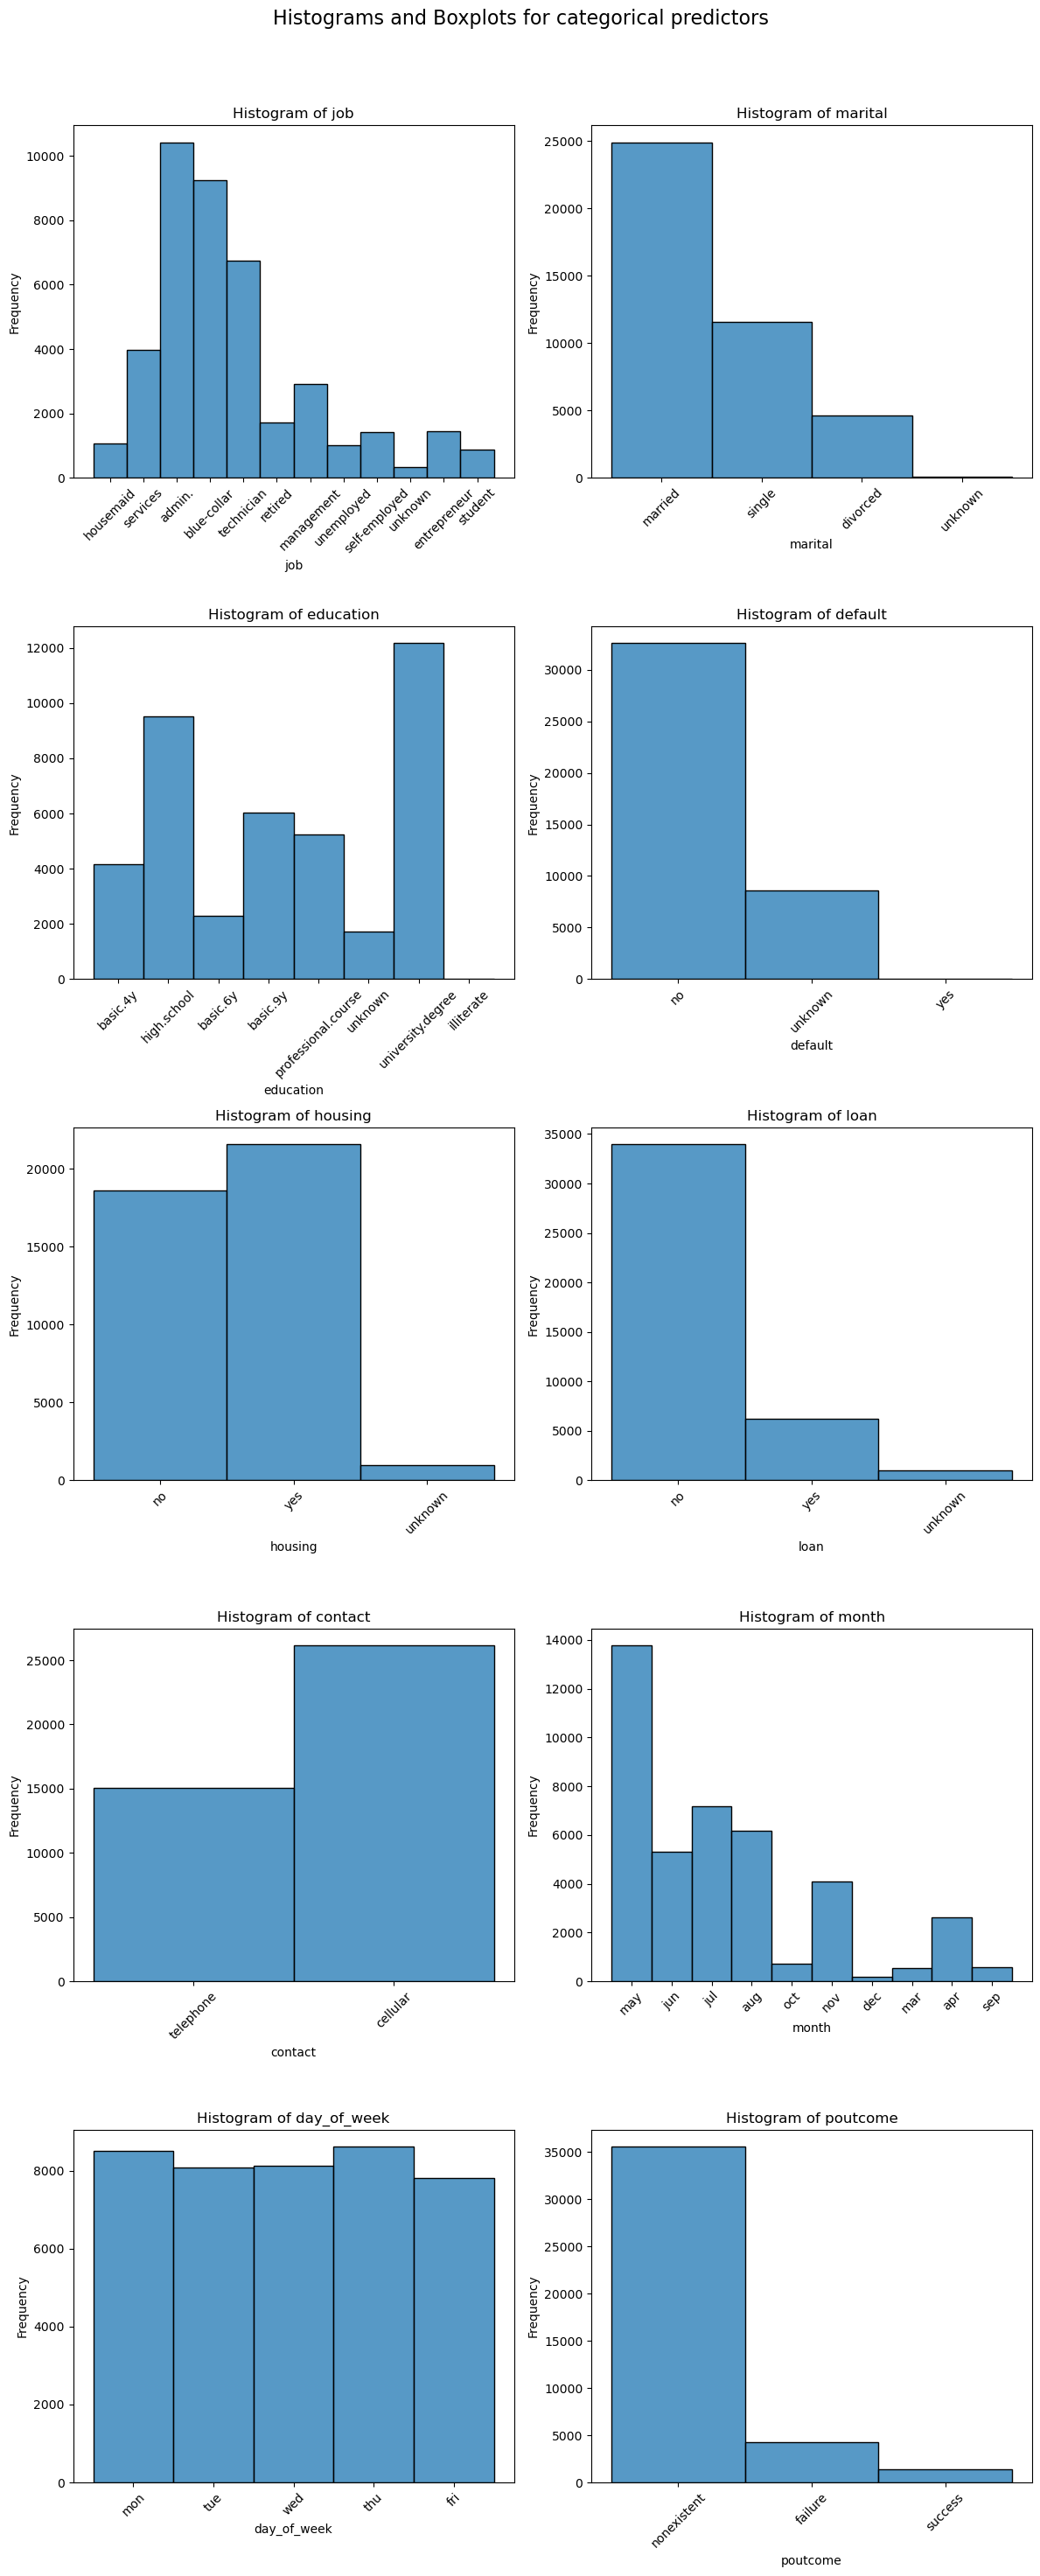

In [15]:
fig, axes = plt.subplots(nrows = int(len(categorical_predictors)/2), ncols = 2, figsize = (12, 3*len(categorical_predictors)))
fig.suptitle('Histograms and Boxplots for categorical predictors', fontsize=16)

lin = 0
for i, column in enumerate(categorical_predictors):
    col = i % 2 
    sns.histplot(df[column], ax=axes[lin, col])
    axes[lin, col].set_title(f"Histogram of {column}")
    axes[lin, col].set_xlabel(column)
    axes[lin, col].set_ylabel("Frequency")
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

The graphs ilustrate the distribution of the categorical predictors:

1. **Job:** The most frequent categories are 'admin', 'blue-collar' and 'techician', which represent the job of the majority clients of the dataset.

2. **Marital:** Almost 25000 clients are 'married', followed by 'single' and 'divorced'. The 'unknown' category is nearly absent, indicating that marital status information is well recorded.

3. **Education:** For 'education', the most common level is 'university.degree', followed by 'high.school'. A smaller number of clients have 'unknwon' education information.

4. **Default:** Regarding 'default', mos clients have 'no' credit in default, while a smaller group is labeled as 'unknown'. This suggests that defaulting on credit is rare among the clients in the dataset.

5. **Housing:** Most of the clients have 'housing' loan, followed closely by those without one and a small portion of records are marked as 'unknown'. This indicates that 'housing' loans are relatively common amog clients.

6. **Loan:** The majority of clients do not have a personal 'loan', while a smaller group does and a few entries are 'unknown'. Overall, these distributions show that 'housing' loans are more frequent than personal 'loans' among the clients in the dataset.

7. **Contact:** For 'contact', most of the clients were reached via 'cellular', while a smaller portion were contacted by 'telephones'. This indicates a shift toward modern communication channels in marketing campaigns.

8. **Month:** The highest number of contacts occurred in 'may', follwed by 'july', 'august' and 'june', showing that most compaigns were concentraded in the middle of the year. Fewer contacts were made during the winter months, such as 'december', suggesting a strong seasonal pattern in campaign activity

9. **day_of_week:** The number of client contacts is distributed from 'monday' to 'friday', with only minor differences, which indicates that marketing calls were made consistently throughout the workweek, without a strong preference for any specific day.

10. **poutcome:** The 'poutcome' represents th outcome of the previous marketing campaign, knowing the values of this variable, it can be affirmed that the majority of the clients have 'nonexistent' value, meaning they were not previously contacted. Among those who were, most experienced 'failure', while a small fraction were succeed. This outcome indicates that prior campaign success rates were low. 

-----
#### Bivariate Variables
-----

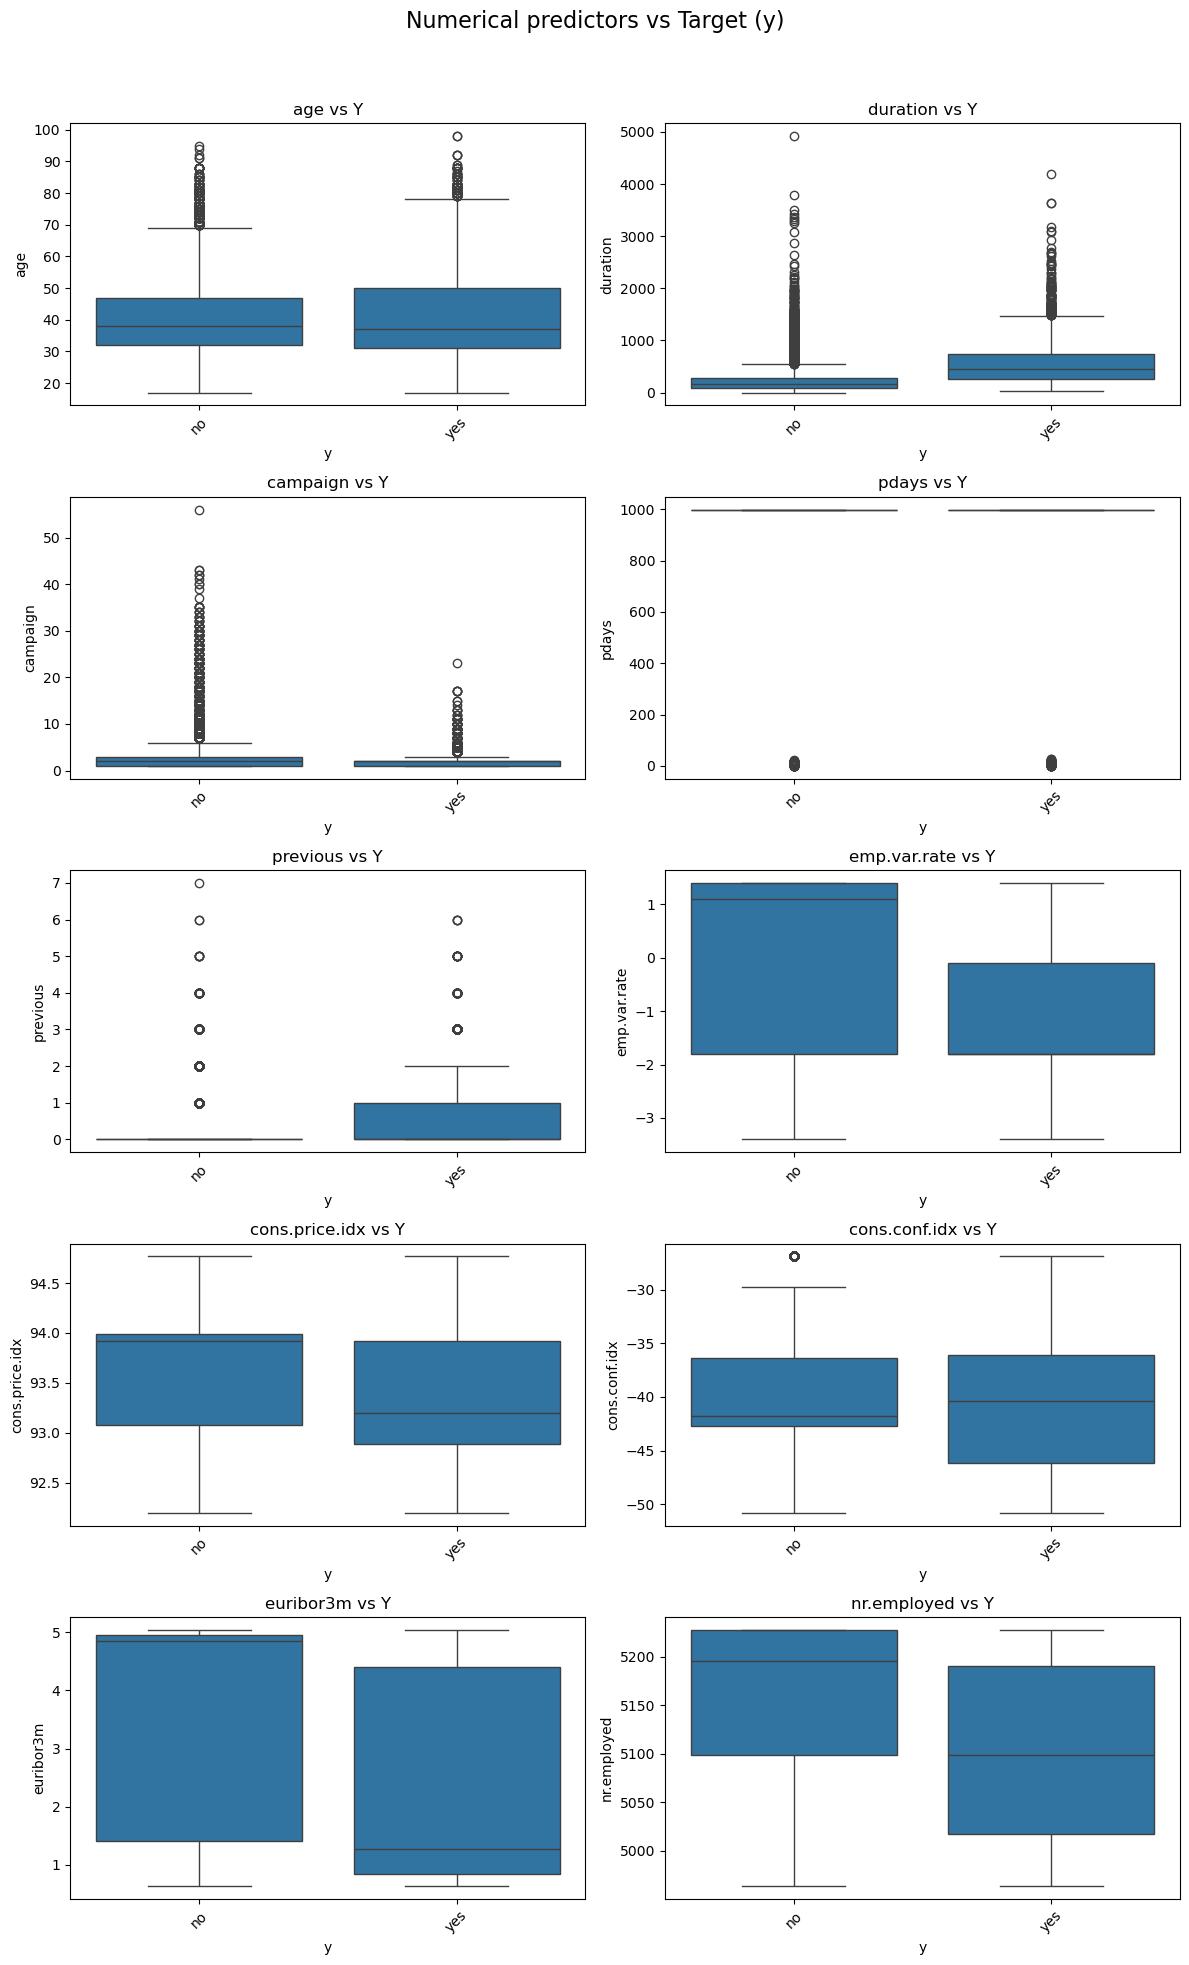

In [16]:
fig, axes = plt.subplots(nrows = int(len(numeric_predictors)/2), ncols = 2, figsize = (12, 2*len(categorical_predictors)))
fig.suptitle('Numerical predictors vs Target (y)', fontsize=16)

lin = 0
for i, column in enumerate(numeric_predictors):
    col = i % 2
    sns.boxplot(data = df, x = goal_attribute, y = column, ax=axes[lin, col])
    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


The *boxplots* illustrate how the numeric predictors relate to the *target variable 'y'*.

1. **'age' vs 'y':** The age distribution is relatively similar between clients who subscribed ('yes') and those who did not ('no'). However, the median age of subscribers is slightly lower than that of non-subscribers. This indicates that younger and middle-aged clients are somewhat more likely to open a term deposite. Older clients apper less responsive, possibily because they already have established financial plans or less incentive to star new deposites. 

2. **'duration' vs 'y':** Clients who subscribed tend to have significantly longer call durations, indicating that longer conversations are strongly associated with successful outcomes, likely beacause the client was interested. However, it is important to note that 'duration' is not a usable predictive feature since it is only knowkn after the call is made. The call can be longer but that does not reflect success at all.

3. **'campaign' vs 'y':** The number of contacts during the campaign tends to be slightly lower for clients who subscribed. This suggests fewer contacts may be more effective, the more times a client is called, the less likely they are to subscribe. 

4. **'pdays' vs 'y':** Most values are near '999', meaning that most clients had not been previsoly contacted. Among those with smallar pdays values (whoe were coontacted more recently in past campaign), there is a slightly higher tendency to subscribe. This pattern suggests that clients who were contacted in recent past campaigns may remember the offer, making them more receptive the next time.

5. **'previous' vs 'y':** Clients who subscribed tend to have a slightly higher number of previous contact than those who did not. This indicaties that clients preivously cantacted may have a higher chance of subscribing again, perhaps beacause those clients were already familiar with the bank's service.

6. **'emp.var.rate' vs 'y':** Clients who subscribed tend to be associated with lower or negative employment variation rates, this suggests that term deposits were more often subscribed during less favorable economic conditions. Economically, when employment rates fall or the job market becomes uncertain, households tend to prefer safer investments over riskier alternatives.

7. **'cons.price.idx' vs 'y':** The consumer price index is slightly lower for clients who subscribed. This suggestes that clients were more likely to subscribe when consumer prices were relatively lower, possibily reflecting periods of lower inflation. However the difference is small, indicating a weak correlation with the target.

8. **'cons.conf.idx' vs 'y':** The consumer confindenc index is more negative for clients who subscribed. This means that during periods of low confidence and economic uncertainty, clients preferred low-risk savings options.

9. **'euribor3m' vs 'y':** The 3-month euribor rate is significatly lower for clients who subscribed. This shows that more deposits were made during low interest-rate environmets.

10. **'nr.employed' vs 'y':** The number of employees is lower for clients who subscribed, meaning that more term deposits were made when employment levels were weaker. This reflects periods of economic slowdown, when people may prefer secure saving options.

##### Distribution of Categorical Variables

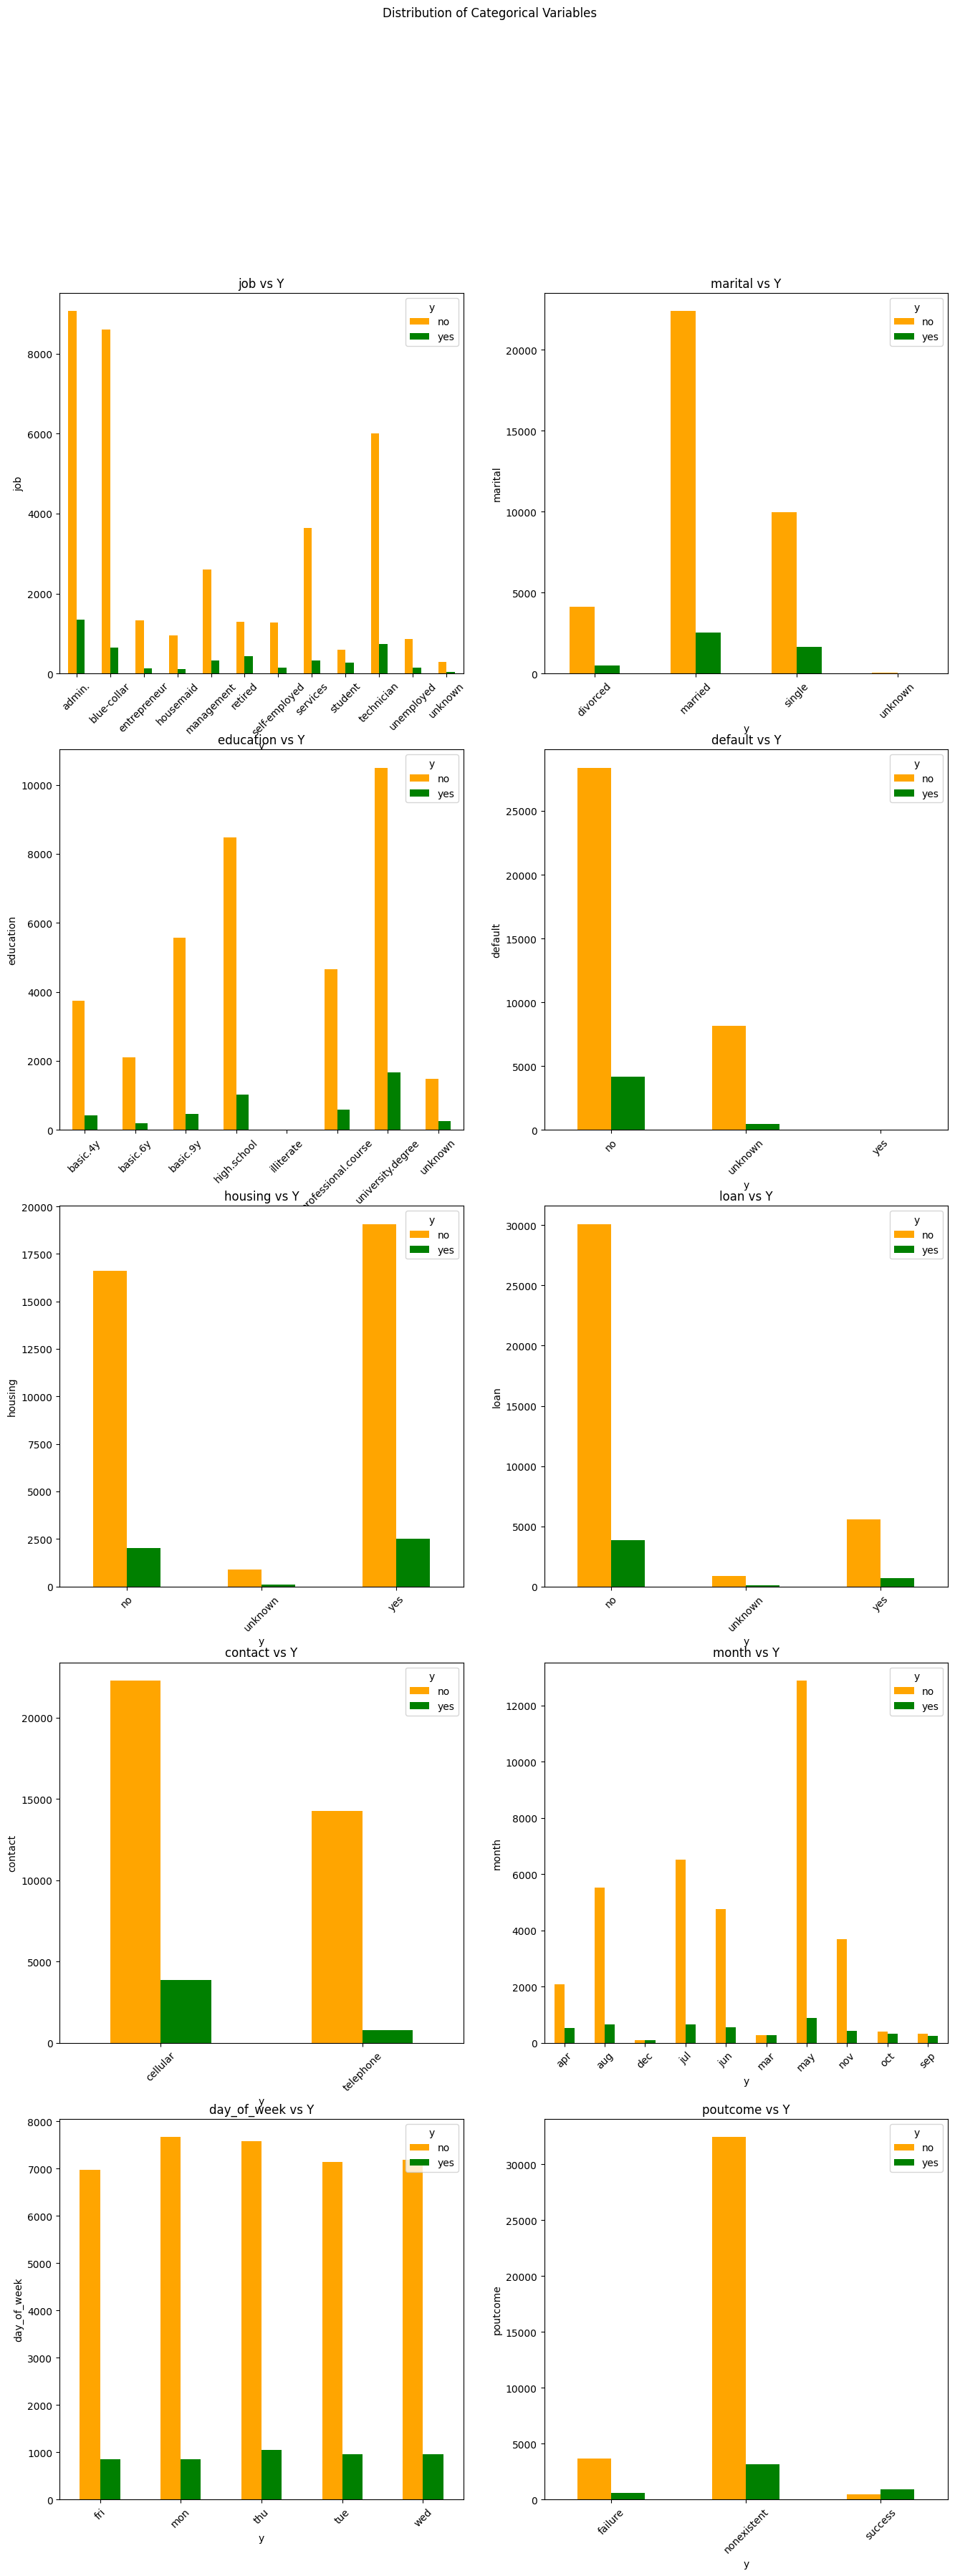

In [19]:
fig, axes = plt.subplots(nrows=int(len(categorical_predictors)/2), ncols = 2, figsize=(16, 40))
fig.suptitle('Distribution of Categorical Variables')

lin=0
for i , column in enumerate(categorical_predictors):
    col = i%2
    CrossTabResult=pd.crosstab(index=df[column], columns=df[goal_attribute])
    CrossTabResult.plot.bar(color=['orange', 'green'], ax=axes[lin,col])

    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)
    
    if i%2 == 1:
        lin = lin + 1

The **barplots** illustrate how different categorical variables are related to the probability of a costumer subscribe a term deposit ('yes') or not ('no'):

1. **'job' vs 'y':** The majority of clients belong to 'admin', 'blue-collar' and 'technician', which also have the largest number of subscription. However, proportionally, the 'housemaid', 'self-employed' and 'unemployed' categories show a higher success rate, even though their total counts are smaller.

2. **'marital' vs 'y':** Most clients are married, followed by single and divorced.

3. **'education' vs 'y':** Clients with university degress and professional courses tend to show higher subscrpition rates than those with basic education levels. This indicates thar higher education is typically associated with greater finacial literacy, which increades the possibility to invest.

4. **'default' vs 'y':** Most clients have no credit in default, and this group also includes nearly all subscriptions. The 'unknown' group has a small number of observations, while almost no clients with a recorded 'yes' default subscribed. This indicates that clients without credit defaults are more financially reliable and more likely to be targeted successfully for saving products.

5. **'housing' vs 'y':** Most clients have housing loan. This indicates that clients without housing loans may have fewer financial obligations.

6. **'loan' vs 'y':** Clients without personal loans show a higher tendency to subscribe. This indicates that clients free from personal debt are less financially constrained, making it easier for them to invest.

7. **'contact' vs 'y':** The majoriy of clients were contacted by 'cellular', which also resulted in most successful subscripitons. 'Telephone' contacts show lower success rate. This indicates that 'cellular' contacts are more direct and convenient, often allowing immediate engagement.
8. **'month' vs 'y':** The campaign's success varies by month. The highest number of subscriptions occured in May, followed by July and August. These months likely correspond to major marketing campaign periods or seasonal trends.

9. **'day' vs 'y':** The succes rate ir consistent across all weekdays, with no major differences btween days (Monday to Friday). This indicates the day of the week actually does not influence on subscription decisions.

10. **'poutcome' vs 'y':** Clients whose previous campaign outcome was 'success' have much higher likelihood of subscribung again. In contrast, those with 'failure' or 'nonexistent' outcomes rarely subscribed. A successful prior contact indicates existing trust and satisfaction.

-----
## 2. Data Cleaning & Preprocessing, Feature Selection
-----

Int this chapter, the steps performed to clean and preprocess the dataset are described, ensuring the data quality required for modeling.
Additionally, the feature selection process is presented, aiming to identify the most relevant attributes that contribute to predicting the target variable. 

##### Information about categorical predictors

In [38]:
for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


unknown_predictors = [
    col for col in categorical_predictors if df[col].astype(str).str.contains("unknown", case=False).any()
]

markdown_output = "#### Some predictors have \"unknown\" label.\n"
markdown_output += "\n".join(f"- {col}" for col in unknown_predictors)
display(Markdown(markdown_output))

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



#### Some predictors have "unknown" label.
- job
- marital
- education
- default
- housing
- loan

##### Overview of the missing values and the precentage of missing values 

In [39]:
df_info = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage Missing': (df.isna().sum() / df.shape[0]) * 100
})
df_info.sort_values(by='Missing Values', ascending=False)

Missing Values  Percentage Missing
age                          0                 0.0
campaign                     0                 0.0
nr.employed                  0                 0.0
euribor3m                    0                 0.0
cons.conf.idx                0                 0.0
cons.price.idx               0                 0.0
emp.var.rate                 0                 0.0
poutcome                     0                 0.0
previous                     0                 0.0
pdays                        0                 0.0
duration                     0                 0.0
job                          0                 0.0
day_of_week                  0                 0.0
month                        0                 0.0
contact                      0                 0.0
loan                         0                 0.0
housing                      0                 0.0
default                      0                 0.0
education                    0                 0.0
marital                      0                 0.0
y                            0                 0.0

The dataset marked missing information with the word "unknown" instead of **NaN**, so the system didn't detect any missing values.
We replaced these text labels to correctly identify the missing values.

In [40]:
markdown_output = "##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning."
display(Markdown(markdown_output))


# Count "unknown" values before cleaning
print("Before cleaning:")
for col in unknown_predictors:
    count = (df[col].astype(str).str.lower() == "unknown").sum()
    if count > 0:
        print(f"{col}: {count} unknowns")

df[unknown_predictors] = df[unknown_predictors].replace('unknown', pd.NA)
missing_values = df.isna().sum()

print()
print('Missing Values (Unknown converted do NaN)')
print(missing_values)

original_num_rows = df.shape[0]
print(original_num_rows)
df = df.dropna()
missing_values_after_drop = df.isna().sum()
num_rows_after_cleanup = df.shape[0]
print(num_rows_after_cleanup)

print()
print('Missing Values after cleaning')
print(missing_values_after_drop)

deleted_rows = original_num_rows-num_rows_after_cleanup
print()
print(deleted_rows, 'rows deleted')

print()
print("Dataset labels after \"unknown\" removal:")

for col in categorical_predictors:
    print(f"{col}: {df[col].unique()}\n")


##### While the dataset does not contain any missing (NaN) values, the presence of the label 'unknown' in certain predictors indicates unreported information and should be treated as missing during data cleaning.

Before cleaning:
job: 330 unknowns
marital: 80 unknowns
education: 1731 unknowns
default: 8597 unknowns
housing: 990 unknowns
loan: 990 unknowns

Missing Values (Unknown converted do NaN)
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
41188
30488

Missing Values after cleaning
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous     

##### Summary:
All "unknown" entries were treated as missing values and removed, ensuring a fully clean dataset of 30.488 complete observations with no remaining missing values.

##### Correlation matrix of numeric variables

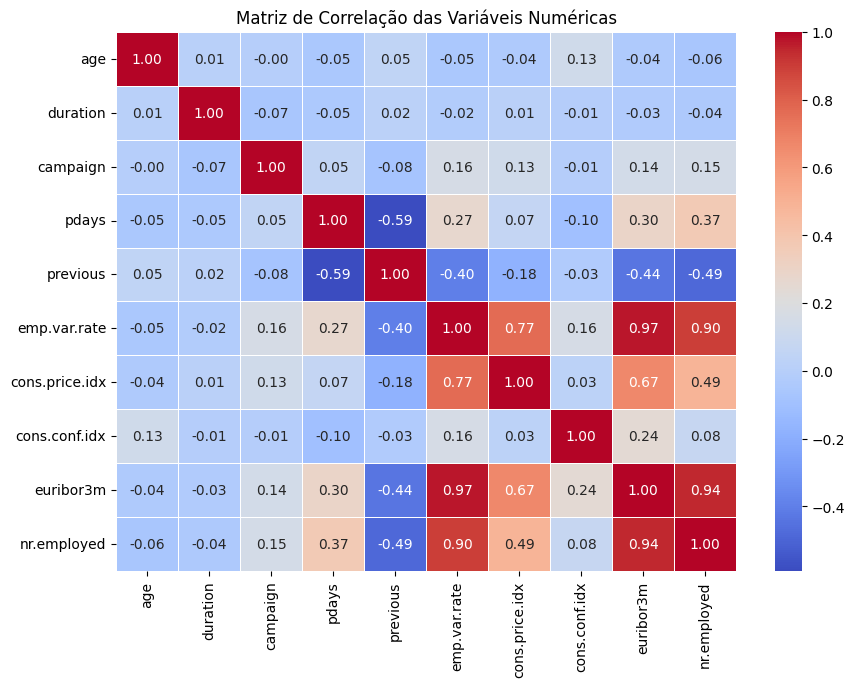

In [19]:
num_pred = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = num_pred.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

The figure above represents the correlation matrix for all numerical predictores in the dataset.
Correlation coefficients range from -1 to +1, where values close to 0 indicate small or no linear relationship between variables, and values close to +/- 1 indicate strong positive or negative linear relationships.

1. Variables with strong correlations:
    - 'emp.var.rate' and 'euribor3m': 0.97
    - 'euribor3m' and 'nr.employed': 0.94
    - 'emp.var.rate' and 'nr.employed': 0.90
    - 'emp.var.rate' and 'cons.price.idx': 0.77
    - 'euribor3m' and 'cons.price.idx': 0.67
       
These storng correlations indicate multicollinearity among the variables.
This means they contain overlapping information about the similar economic conditions.

2. Variables with moderate correlations:
   - 'pdays' and 'previous': -0.59 (negative correlation, because clients who have never been previously contacted have 'pdays'=999 and 'previous'=0).
   - 'pdays' and 'nr.employed': 0.37
   - 'pdays' and 'euribor3m': 0.30
   - 'pdays' and 'emp.var.rate':0.27

These correlations suggests that the timing of previous contacts is somehow related to the economic conditions during the campaign periods.

3. Variables with weak correlations:
   - 'age' and 'campaing' show very weak correlations with all other numeric features, indicating that client demographics and the number of contact attempts are largely independent economic variables;
   - 'duration' is nearly uncorrelated with any other variable, meaning it provides unique information, however, this variable can act as a data leakage variable, since it is known only after call ends.
   - 'cons.conf.idx' has weak relationships with all other economic indicators. This suggests that it captures independent sentiment information that is not directly reflected in macroeconomic variables, like employment or interest rates.


##### Summary:
The dataset's macroeconomic variables show strong internal relationships. 
In contrast, attributes such as age, campaing and duration, are largely independent.


##### Correlation Matrix between numeric variables and the target

Correlação com o target 'y' (1=yes, 0=no):
duration          0.393530
previous          0.228003
cons.conf.idx     0.061638
age               0.048727
campaign         -0.069206
cons.price.idx   -0.128752
emp.var.rate     -0.305365
euribor3m        -0.315869
pdays            -0.327509
nr.employed      -0.364230
dtype: float64


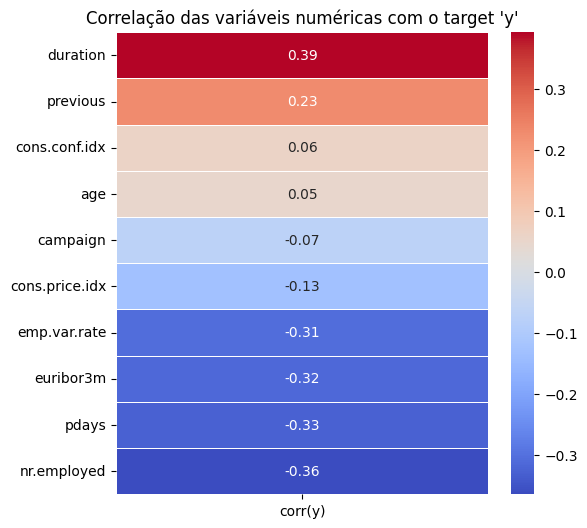

In [19]:
y_num = df['y'].str.lower().map({'yes': 1, 'no': 0}).astype(float)
num_pred = df.select_dtypes(include=['number'])

corr_with_y = num_pred.apply(lambda col: col.corr(y_num)).sort_values(ascending=False)

print("Correlação com o target 'y' (1=yes, 0=no):")
print(corr_with_y)

plt.figure(figsize=(6, 6))
sns.heatmap(corr_with_y.to_frame(name='corr(y)'), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlação das variáveis numéricas com o target 'y'")
plt.show()


By analysing the correlation matrices, it is possible to observe a strong collinearity between 'nr.employed', 'emp.var.rate' and 'euribor3m'. Keeping highly correlated variables is not advantageous, as it introduces redundancy and multicollinearity, leading to unstable coefficients and less interpretable models.
To decide which variable to remove, we examined the correlation of each feature with the target 'y' and eliminated the one with the weakest relationship (lowest |corr|). Among the 3 numeric variables, 'emp.var.rate' showed the weakest correlation with the target 'y', and was therefore removed from the dataset.

##### Removing the feature that has the worst correlation with the target

In [20]:
df.drop('emp.var.rate', axis=1)

age          job  marital            education default housing loan  \
0       56    housemaid  married             basic.4y      no      no   no   
2       37     services  married          high.school      no     yes   no   
3       40       admin.  married             basic.6y      no      no   no   
4       56     services  married          high.school      no      no  yes   
6       59       admin.  married  professional.course      no      no   no   
...    ...          ...      ...                  ...     ...     ...  ...   
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
0      telephone   may         mon       261         1    999         0   
2      telephone   may         mon       226         1    999         0   
3      telephone   may         mon       151         1    999         0   
4      telephone   may         mon       307         1    999         0   
6      telephone   may         mon       139         1    999         0   
...          ...   ...         ...       ...       ...    ...       ...   
41183   cellular   nov         fri       334         1    999         0   
41184   cellular   nov         fri       383         1    999         0   
41185   cellular   nov         fri       189         2    999         0   
41186   cellular   nov         fri       442         1    999         0   
41187   cellular   nov         fri       239         3    999         1   

          poutcome  cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0      nonexistent          93.994          -36.4      4.857       5191.0   no  
2      nonexistent          93.994          -36.4      4.857       5191.0   no  
3      nonexistent          93.994          -36.4      4.857       5191.0   no  
4      nonexistent          93.994          -36.4      4.857       5191.0   no  
6      nonexistent          93.994          -36.4      4.857       5191.0   no  
...            ...             ...            ...        ...          ...  ...  
41183  nonexistent          94.767          -50.8      1.028       4963.6  yes  
41184  nonexistent          94.767          -50.8      1.028       4963.6   no  
41185  nonexistent          94.767          -50.8      1.028       4963.6   no  
41186  nonexistent          94.767          -50.8      1.028       4963.6  yes  
41187      failure          94.767          -50.8      1.028       4963.6   no  

[30488 rows x 20 columns]

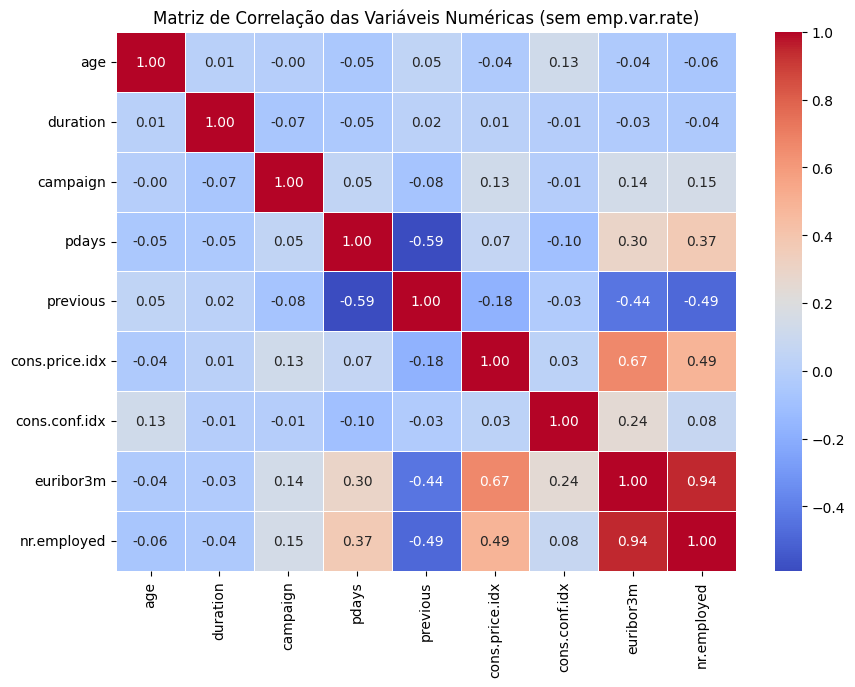

In [21]:
num_pred = df.select_dtypes(include=['int64', 'float64'])

cols_to_drop =['emp.var.rate']
num_col = num_pred.drop(columns=cols_to_drop)

correlation_matrix = num_col.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas (sem emp.var.rate)')
plt.show()


As we can see, the variable 'emp.var.rate' is not present anymore in the correlation matrix

### Preprocessing

##### Transforming all the variables in numeric

In [41]:
df_all_numeric = df.copy()

# binary variables transformation
binary_vars = ["default", "housing", "loan", "y"]
non_binary_vars = ["job", "marital", "education", "poutcome"]

for var in binary_vars:
    df_all_numeric[var] = (df_all_numeric[var].values == 'yes').astype(int)

df_all_numeric['contact'] = (df_all_numeric['contact'].values == 'cellular').astype(int)

# non_binary variables transformation
df_all_numeric = pd.get_dummies(df_all_numeric, columns=non_binary_vars, drop_first=True, dtype=int)

# date type variables transformation
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

day_map = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

df_all_numeric['month'] = df_all_numeric['month'].map(month_map)
df_all_numeric['day_of_week'] = df_all_numeric['day_of_week'].map(day_map)

# TO USE FOR SCALING DF_ALL_NUMERIC
non_binary_preds = list(numeric_predictors)
non_binary_preds.extend(["month", "day_of_week"])

df_all_numeric

age  default  housing  loan  contact  month  day_of_week  duration  \
0       56        0        0     0        0      5            1       261   
2       37        0        1     0        0      5            1       226   
3       40        0        0     0        0      5            1       151   
4       56        0        0     1        0      5            1       307   
6       59        0        0     0        0      5            1       139   
...    ...      ...      ...   ...      ...    ...          ...       ...   
41183   73        0        1     0        1     11            5       334   
41184   46        0        0     0        1     11            5       383   
41185   56        0        1     0        1     11            5       189   
41186   44        0        0     0        1     11            5       442   
41187   74        0        1     0        1     11            5       239   

       campaign  pdays  ...  marital_married  marital_single  \
0             1    999  ...                1               0   
2             1    999  ...                1               0   
3             1    999  ...                1               0   
4             1    999  ...                1               0   
6             1    999  ...                1               0   
...         ...    ...  ...              ...             ...   
41183         1    999  ...                1               0   
41184         1    999  ...                1               0   
41185         2    999  ...                1               0   
41186         1    999  ...                1               0   
41187         3    999  ...                1               0   

       education_basic.6y  education_basic.9y  education_high.school  \
0                       0                   0                      0   
2                       0                   0                      1   
3                       1                   0                      0   
4                       0                   0                      1   
6                       0                   0                      0   
...                   ...                 ...                    ...   
41183                   0                   0                      0   
41184                   0                   0                      0   
41185                   0                   0                      0   
41186                   0                   0                      0   
41187                   0                   0                      0   

       education_illiterate  education_professional.course  \
0                         0                              0   
2                         0                              0   
3                         0                              0   
4                         0                              0   
6                         0                              1   
...                     ...                            ...   
41183                     0                              1   
41184                     0                              1   
41185                     0                              0   
41186                     0                              1   
41187                     0                              1   

       education_university.degree  poutcome_nonexistent  poutcome_success  
0                                0                     1                 0  
2                                0                     1                 0  
3                                0                     1                 0  
4                                0                     1                 0  
6                                0                     1                 0  
...                            ...                   ...               ...  
41183                            0                     1                 0  
41184                            0                     1                 0  
41185     

##### Removing outliers

In [42]:
def calculate_outliers(df):
    outliers_info = {}
    for column in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers_info[column] = len(outliers)
    
    return outliers_info

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for column in columns:
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
    return df_clean

# Calcular os outliers em todas as variáveis numéricas
outliers_summary = calculate_outliers(df_all_numeric)
outliers_df = pd.DataFrame(list(outliers_summary.items()), columns=['Variable', 'Number of Outliers'])
print(outliers_df)

columns_with_outliers = ["campaign", "duration", "age"]
print("Df rows: ", df_all_numeric.shape[0])
df_all_numeric = remove_outliers_iqr(df_all_numeric, columns_with_outliers)
print("Df rows after removing outliers: ", df_all_numeric.shape[0])


                         Variable  Number of Outliers
0                             age                 458
1                         default                   3
2                         housing                   0
3                            loan                4768
4                         contact                   0
5                           month                   0
6                     day_of_week                   0
7                        duration                2174
8                        campaign                1675
9                           pdays                1310
10                       previous                4652
11                   emp.var.rate                   0
12                 cons.price.idx                   0
13                  cons.conf.idx                 396
14                      euribor3m                   0
15                    nr.employed                   0
16                              y                3859
17                job_blue-c

#### Outlier detection and Removal - Summary
- Methodology: the **IQR Method** (interquartile range -> Q1/Q3 +/- 1.5*IQR) was applied to identify and remover outliers from the numerical features.

- Variables affected: outlier removal was applied only to the variables 'campaign', 'duration' and 'age', where numerical extremes were detected.

- Impact on dataset size: the dataset was reduced from 30488 to 26337 records, resulting in the removal of 4151 rows.

  

##### Conclusion:

Outlier removal reduced the influence of extreme valuis in continuous variables while preserving the validity of category and binary features, this ensures cleaner and more reliable numerical data for subsequent modeling.


   Count  Percentage
y                   
0  23848   90.549417
1   2489    9.450583


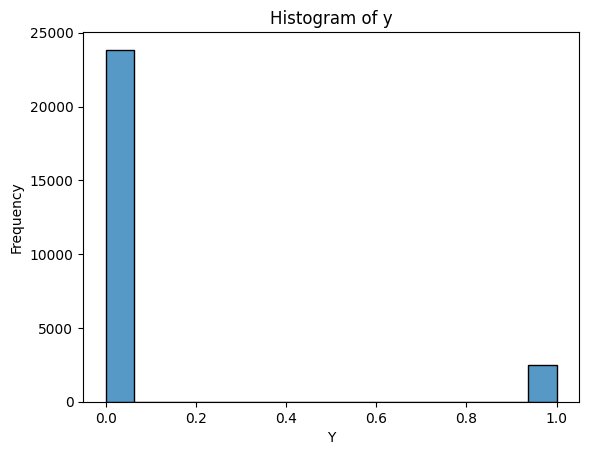

In [43]:
y_counts = df_all_numeric['y'].value_counts()
y_percentage = df_all_numeric['y'].value_counts(normalize=True)*100

y_var_dataframe = pd.DataFrame({
    "Count": y_counts,
    "Percentage": y_percentage
})

print(y_var_dataframe)

sns.histplot(df_all_numeric[goal_attribute])

plt.title(f"Histogram of {goal_attribute}")
plt.xlabel("Y")
plt.ylabel("Frequency")

plt.show()

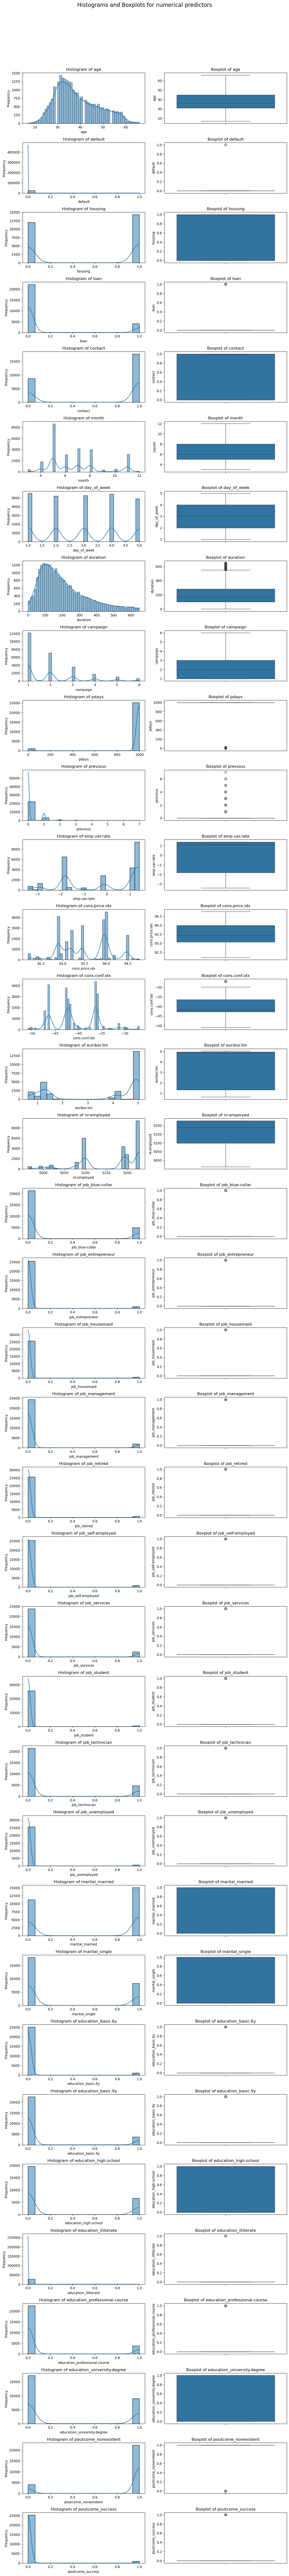

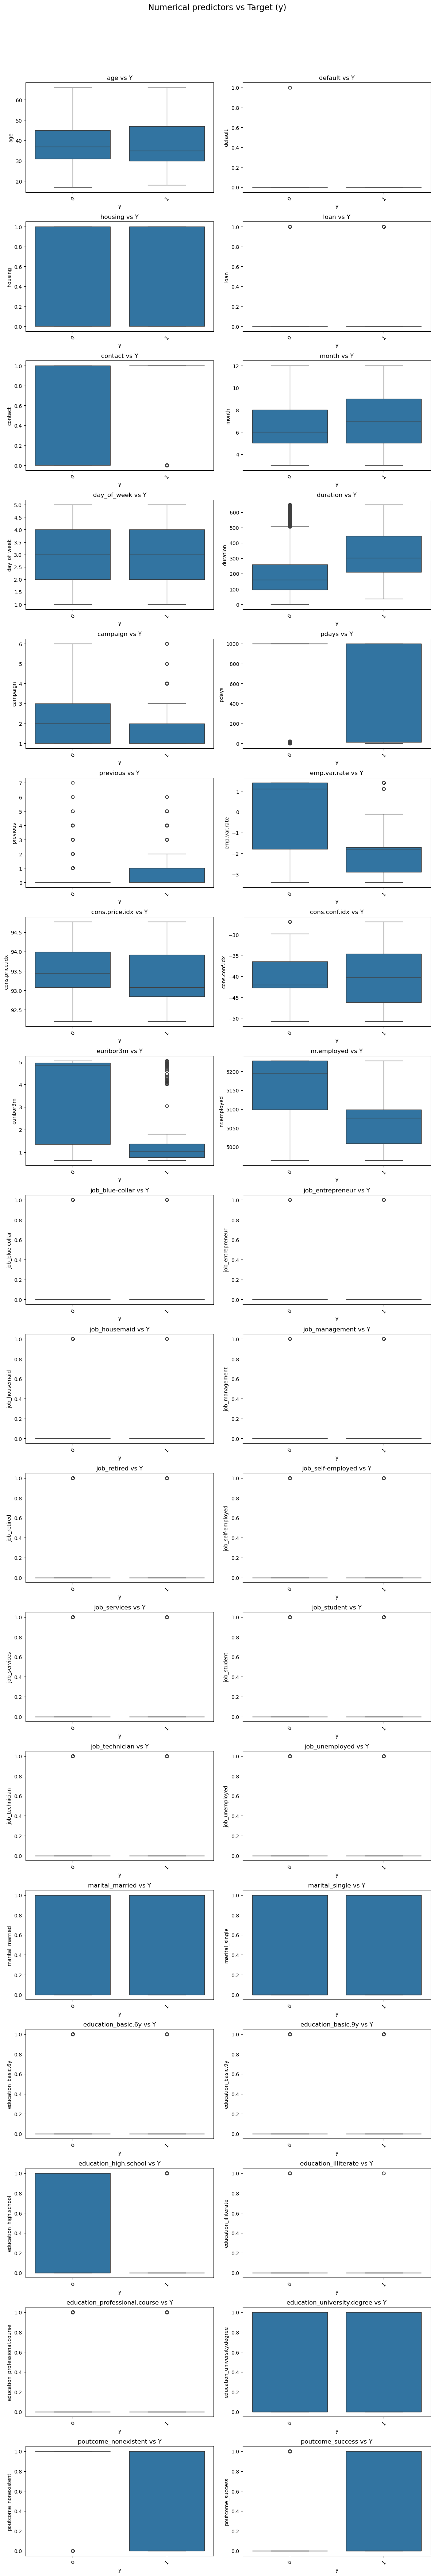

In [27]:
pred = df_all_numeric.columns.drop(goal_attribute)

fig, axe = plt.subplots(nrows = len(pred), ncols = 2, figsize = (12, 3*len(pred)))
fig.suptitle('Histograms and Boxplots for numerical predictors', fontsize=16)

for i, column in enumerate(pred):
    sns.histplot(df_all_numeric[column], ax=axe[i, 0], kde=True)
    axe[i, 0].set_title(f"Histogram of {column}")
    axe[i, 0].set_xlabel(column)
    axe[i, 0].set_ylabel("Frequency")

    sns.boxplot(y=df_all_numeric[column], ax=axe[i, 1])
    axe[i, 1].set_title(f"Boxplot of {column}")
    axe[i, 1].set_ylabel(column)


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


fig, axes = plt.subplots(nrows = int(len(pred)/2), ncols = 2, figsize = (12, 2*len(pred)))
fig.suptitle('Numerical predictors vs Target (y)', fontsize=16)


lin = 0
for i, column in enumerate(pred):
    col = i % 2
    sns.boxplot(data = df_all_numeric, x = goal_attribute, y = column, ax=axes[lin, col])
    axes[lin, col].set_title(f"{column} vs Y")
    axes[lin, col].set_xlabel("y")
    axes[lin, col].set_ylabel(column)
    axes[lin, col].tick_params(axis='x', rotation=45)

    if i%2 == 1:
        lin = lin + 1


plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Looking at the **boxplots** after cleaning, we can clearly see that the outliers have benn removed. The variables now show more regular distributions without extreme values.

##### Correlation matrix of all the variables converted to numeric

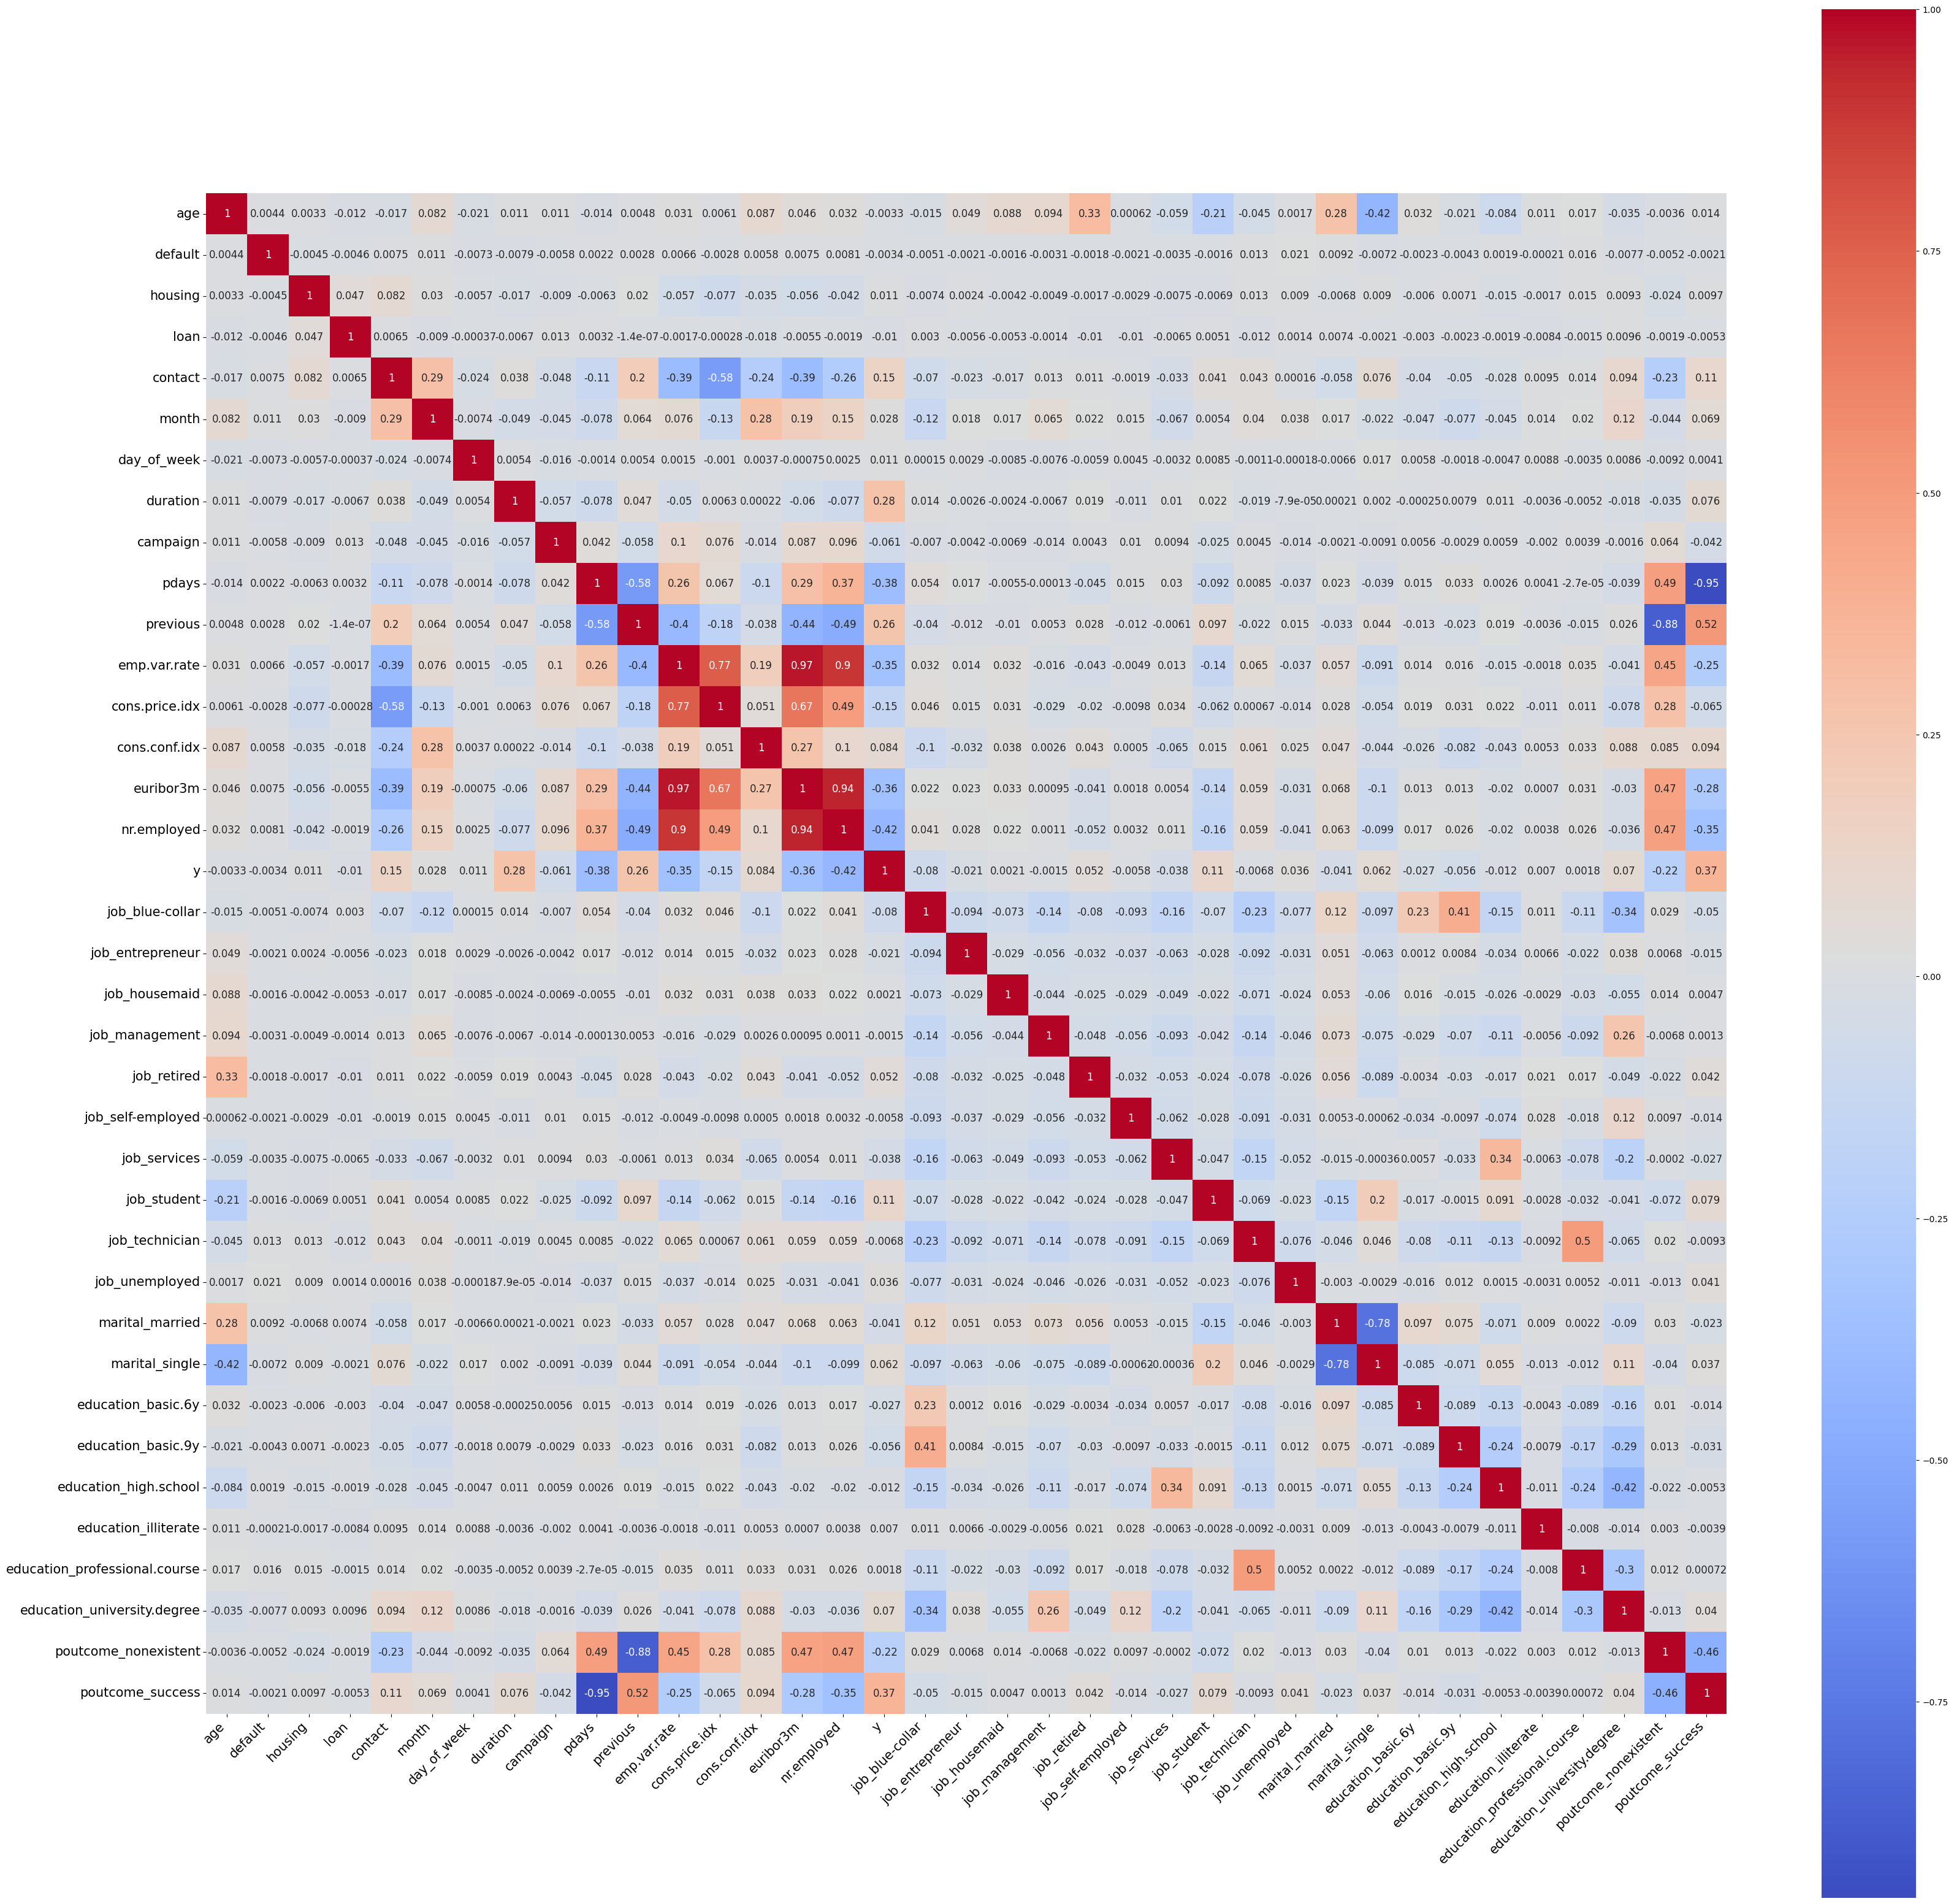

In [30]:
plt.figure(figsize=(40, 40))
sns.heatmap(df_all_numeric.corr(),
            annot=True,
            square=True,
            cmap='coolwarm',
            annot_kws={'size': 12})  # make numbers smaller or larger
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.show()

##### Summary:

The correlation matrix shoes that most of the variables are weakly correlated, indicating low redundancy across predictors. 

All other variables, including client and campaign features, show very low correlations and the **target variable (y)** is weakly correlated with all predictors.

### Feature Selection

#### Filter Methods

Chi-Squared

In [44]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    print('##### Chi-Squared Results ##### \n')
    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

selected_predictors = FunctionChisq(df, goal_attribute, categorical_predictors)
categorical_to_remove = [var for var in categorical_predictors if var not in selected_predictors]
print("Features to remove by chisq: ", categorical_to_remove)

##### Chi-Squared Results ##### 

job is correlated with y | P-Value: 2.0331366964644903e-150
marital is correlated with y | P-Value: 1.5437375141708132e-12
education is correlated with y | P-Value: 1.4392502431733715e-22
default is NOT correlated with y | P-Value: 1.0
housing is NOT correlated with y | P-Value: 0.08165923643721153
loan is NOT correlated with y | P-Value: 0.39315834880742473
contact is correlated with y | P-Value: 4.9019513362846015e-139
month is correlated with y | P-Value: 0.0
day_of_week is correlated with y | P-Value: 3.6893335993552954e-05
poutcome is correlated with y | P-Value: 0.0
Features to remove by chisq:  ['default', 'housing', 'loan']


##### Summary: 

Variable such as 'job', 'marital', 'education', 'contact' and 'day_of_week' are statistically correlated with the target variable ('y'), meaning they provide valuable information for prediction.

In contrast, 'defaul', 'housing', 'loan' show no significant relationship with the target (p-values > 0.05) and can be considered for removal from the model.

Characteristics like a client's profession or education level and how they were contacted affect their likelihood of subscribing, while having a loan or credit default does not seem to influence this decision.

ANOVA

In [45]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

selected_predictors = FunctionAnova(df, goal_attribute, numeric_predictors)
numeric_to_remove = [var for var in numeric_predictors if var not in selected_predictors]
print("Features to remove by ANOVA: ", numeric_to_remove)

##### ANOVA Results ##### 

age is correlated with y | P-Value: 1.6971770131902196e-17
duration is correlated with y | P-Value: 0.0
campaign is correlated with y | P-Value: 1.083798752264484e-33
pdays is correlated with y | P-Value: 0.0
previous is correlated with y | P-Value: 0.0
emp.var.rate is correlated with y | P-Value: 0.0
cons.price.idx is correlated with y | P-Value: 7.760950794014084e-113
cons.conf.idx is correlated with y | P-Value: 4.6513680455036e-27
euribor3m is correlated with y | P-Value: 0.0
nr.employed is correlated with y | P-Value: 0.0
Features to remove by ANOVA:  []


##### Summary:

All continuos variables show **p-values**<0.05, meaning they are statistically correlated with the targe variable ('y').

Therefore, no numeric predictors were removed by th ANOVA test. This indicates that every continous feature in the dataset provides relevant information for predicting whether a client subscribes to a term deposit.

Creating filter methods dataset

In [46]:
df_filter = df_all_numeric.drop(columns=['default', 'housing', 'loan'])

##### Summary:

Based on the results of **Chi-square** test, the categorical variables 'default', 'housing' and 'loan' showed no statistically signficant relationships with the target, once their p-values were greater than 0.05.

To improve model efficiency and remove irrelevant predictors, these variables were excluded from the dataset. As a result, a new filtered dataset named **df_filter** was created by dropping the columns.

#### Embebed Methods

##### PCA - Principal Component Analysis

In [47]:
X = df_all_numeric.drop(columns=['y'])
y = df_all_numeric['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.30, random_state=42, stratify=y)

# Aplicar o scaling apenas após a divisão dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nTamanho de X_train_scaled:", X_train_scaled.shape)
print("\nTamanho de X_test_scaled:", X_test_scaled.shape)

from sklearn.decomposition import PCA 
pca = PCA(n_components=0.95) #95% da variância
X_train_scaled_pca = pca.fit_transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

print("\nTamanho de X_train_scaled_pca:", X_train_scaled_pca.shape)
print("\nTamanho de X_test_scaled_pca:", X_test_scaled_pca.shape)


Tamanho de X_train_scaled: (18435, 36)

Tamanho de X_test_scaled: (7902, 36)

Tamanho de X_train_scaled_pca: (18435, 27)

Tamanho de X_test_scaled_pca: (7902, 27)


##### Summary:

PCA (Principal Component Analysis) was applied to reduce dimensionality and address multicollinearity amont the predictor

##### Lasso Regularization

In [48]:
def lasso_regularization(df):
 
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.feature_selection import SelectFromModel
    X = df.iloc[:,:-1]          
    y = df.iloc[:,-1] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
 
 
 
    scaler = StandardScaler()
    scaler.fit(X_train)
 
    # fit a Logistic Regression model and feature selection altogether 
    # select the Lasso (l1) penalty.
    # The selectFromModel class from sklearn, selects the features which coefficients are non-zero
 
    sel_ = SelectFromModel(LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))
 
    sel_.fit(scaler.transform(X_train), y_train)
 
    # make a list with the selected features
    selected_feat = X_train.columns[(sel_.get_support())]
    print("Number of features which coefficient was shrank to zero: ", np.sum(sel_.estimator_.coef_ == 0))
    # identify the removed features like this:
    removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
    print(removed_feats)
 
    # transform data
    X_lasso = pd.DataFrame(sel_.transform(scaler.transform(X)), columns=selected_feat)
    return X_lasso

In [49]:
lasso_regularization(df_all_numeric)



Number of features which coefficient was shrank to zero:  10
Index(['default', 'month', 'duration', 'euribor3m', 'job_blue-collar',
       'job_self-employed', 'marital_single', 'education_basic.9y',
       'education_illiterate', 'poutcome_nonexistent'],
      dtype='object')


age   housing      loan   contact  day_of_week  campaign  \
0      1.861196 -1.090407 -0.427071 -1.428991    -1.399110 -0.808755   
1     -0.161311  0.917089 -0.427071 -1.428991    -1.399110 -0.808755   
2      0.158032 -1.090407 -0.427071 -1.428991    -1.399110 -0.808755   
3      1.861196 -1.090407  2.341531 -1.428991    -1.399110 -0.808755   
4      2.180539 -1.090407 -0.427071 -1.428991    -1.399110 -0.808755   
...         ...       ...       ...       ...          ...       ...   
26332 -0.161311  0.917089 -0.427071  0.699794     1.440418 -0.808755   
26333 -1.012893  0.917089 -0.427071  0.699794     1.440418 -0.808755   
26334  0.796719 -1.090407 -0.427071  0.699794     1.440418 -0.808755   
26335  1.861196  0.917089 -0.427071  0.699794     1.440418 -0.024601   
26336  0.583823 -1.090407 -0.427071  0.699794     1.440418 -0.808755   

          pdays  previous  emp.var.rate  cons.price.idx  ...  job_retired  \
0      0.209518 -0.377256      0.735971        0.820332  ...    -0.168100   
1      0.209518 -0.377256      0.735971        0.820332  ...    -0.168100   
2      0.209518 -0.377256      0.735971        0.820332  ...    -0.168100   
3      0.209518 -0.377256      0.735971        0.820332  ...    -0.168100   
4      0.209518 -0.377256      0.735971        0.820332  ...    -0.168100   
...         ...       ...           ...             ...  ...          ...   
26332  0.209518 -0.377256     -0.639998        2.152184  ...    -0.168100   
26333 -4.757538  1.524731     -0.639998        2.152184  ...    -0.168100   
26334  0.209518 -0.377256     -0.639998        2.152184  ...    -0.168100   
26335  0.209518 -0.377256     -0.639998        2.152184  ...     5.948832   
26336  0.209518 -0.377256     -0.639998        2.152184  ...    -0.168100   

       job_services  job_student  job_technician  job_unemployed  \
0         -0.323766    -0.146045       -0.471049       -0.156708   
1          3.088652    -0.146045       -0.471049       -0.156708   
2         -0.323766    -0.146045       -0.471049       -0.156708   
3          3.088652    -0.146045       -0.471049       -0.156708   
4         -0.323766    -0.146045       -0.471049       -0.156708   
...             ...          ...             ...             ...   
26332     -0.323766    -0.146045       -0.471049       -0.156708   
26333     -0.323766    -0.146045       -0.471049        6.381285   
26334     -0.323766    -0.146045       -0.471049       -0.156708   
26335     -0.323766    -0.146045       -0.471049       -0.156708   
26336     -0.323766    -0.146045        2.122921       -0.156708   

       marital_married  education_basic.6y  education_high.school  \
0             0.864719           -0.221105              -0.581643   
1             0.864719           -0.221105               1.719266   
2             0.864719            4.522742              -0.581643   
3             0.864719           -0.221105               1.719266   
4             0.864719           -0.221105              -0.581643   
...                ...                 ...                    ...   
26332         0.864719           -0.221105              -0.581643   
26333        -1.156445           -0.221105              -0.581643   
26334         0.864719           -0.221105              -0.581643   
26335         0.864719           -0.221105              -0.581643   
26336         0.864719           -0.221105              -0.581643   

       education_professional.course  education_university.degree  
0                          -0.405248                    -0.724930  
1                          -0.405248                    -0.724930  
2                          -0.405248                    -0.724930  
3                          -0.405248                    -0.724930  
4                           2.467623                    -0.724930  
...                              ...                          ...  
26332                      -0.405248                     1.379444  
26333                      -0.40

In [38]:
df_lasso = df_all_numeric.drop(['default', 'month', 'duration', 'euribor3m', 'job_blue-collar',
       'job_self-employed', 'marital_single', 'education_basic.9y',
       'education_illiterate', 'poutcome_nonexistent'], axis=1)

df_lasso.columns

Index(['age', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'nr.employed', 'y', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married',
       'education_basic.6y', 'education_high.school',
       'education_professional.course', 'education_university.degree',
       'poutcome_success'],
      dtype='object')

##### Summary:

Lasso regularization was applied using **Logistic Regression model** with an L1 penalty to automatically select the most relevant features. This method reduce less important coefficients to zero, effectively removing weaking or redundant predictors. As a result, 10 features were eliminated - including 'default', 'month', 'duration', 'euribor3m', 'job_blue-collar', 'job_self-employed', 'marital_single', 'education_basic.9y', 'education_illiterate', 'poutcome_nonexistent', due to low predictive power. The final dataset **df_lasso** retained 26 features, reducing dimensionality and improving model simplicity while keeping the most informative predictors

### Predictive Models

**K-Nearest Neighbors (KNN)**

In [56]:
datasets = {
    'All Numeric': df_all_numeric,
    'Filtered': df_filter,
    'LASSO Selected': df_lasso
}

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
knn = KNeighborsClassifier(n_neighbors=50)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results_summary = []

# Loop through datasets
for name, dataset in datasets.items():
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    
    X, y = dataset.drop('y', axis=1), dataset['y']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    cv_results = cross_validate(knn, X_train, y_train, cv=skf, scoring=scoring)
    
    print("\nCross-Validation Performance (Training Data):")
    for metric in scoring:
        mean = cv_results[f'test_{metric}'].mean()
        std = cv_results[f'test_{metric}'].std()
        print(f"{metric.capitalize():<18}: {mean:.3f} (± {std:.3f})")
    
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=[1, 0])


    print("\nCross-Validation Performance (Test Data):")
    
    # Print numeric form
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
    disp.plot(cmap='Blues')
    plt.title('Matriz de Confusão')
    plt.show()

    print(classification_report(y_test, y_pred, digits=3))

NameError: name 'df_filter' is not defined

**Naive Bayes**


Naive Bayes

Cross-Validation Performance (Training Data):
Accuracy          : 0.880 (± 0.006)
Precision_macro   : 0.664 (± 0.011)
Recall_macro      : 0.689 (± 0.009)
F1_macro          : 0.675 (± 0.010)

Cross-Validation Performance (Test Data):


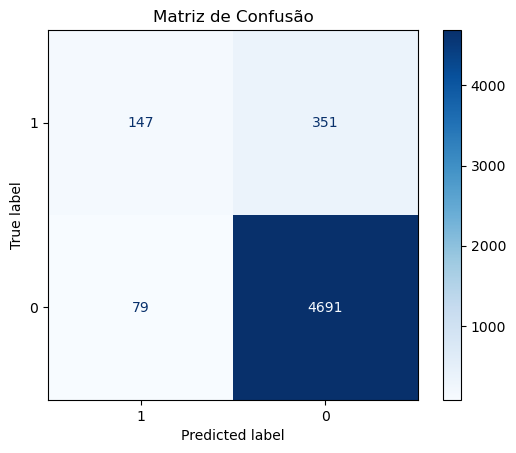

              precision    recall  f1-score   support

           0      0.930     0.983     0.956      4770
           1      0.650     0.295     0.406       498

    accuracy                          0.918      5268
   macro avg      0.790     0.639     0.681      5268
weighted avg      0.904     0.918     0.904      5268



In [41]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
nb = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

results_summary = []

# Loop through datasets

print(f"\n{'='*60}")
print(f"Naive Bayes")
print(f"{'='*60}")
    
X, y = dataset.drop('y', axis=1), dataset['y']
    
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
    
cv_results = cross_validate(nb, X_train, y_train, cv=skf, scoring=scoring)
    
print("\nCross-Validation Performance (Training Data):")
for metric in scoring:
    mean = cv_results[f'test_{metric}'].mean()
    std = cv_results[f'test_{metric}'].std()
    print(f"{metric.capitalize():<18}: {mean:.3f} (± {std:.3f})")
    
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
    
cm = confusion_matrix(y_test, y_pred, labels=[1,0])


print("\nCross-Validation Performance (Test Data):")
    
# Print numeric form
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1, 0])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.show()

print(classification_report(y_test, y_pred, digits=3))

### Ensemble Learing

##### Bagging Model

In [59]:
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
proba_b  = bagging.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba_b):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Holdout Accuracy: 0.9254
Holdout ROC-AUC : 0.9376

Confusion Matrix:
[[4620  150]
 [ 243  255]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9500    0.9686    0.9592      4770
           1     0.6296    0.5120    0.5648       498

    accuracy                         0.9254      5268
   macro avg     0.7898    0.7403    0.7620      5268
weighted avg     0.9197    0.9254    0.9219      5268



##### Bagging Classifier Performance:

The Bagging Classifier model correctly classified 92.54% of the instances.

Confusion matrix:
- The model correctly classified 4620 instances of class 0 and 255 of class 1.
- It misclassified 150 instances of class 0 and 243 of class 1

Classification Report:
- Class 0: High precision (95%) and recall (96.86%). Performs very well
- Class 1: Moderate precision (62.96%) and recall (51.20%). Struggles to detect positives.
- Weighted F1-Score: 0.92.

Overall, the model performs very well, especially for the majority class (0). However, it misses several positive cases (class 1) due to class imbalance. 

##### Random Forest Model

In [60]:
#Random Forest
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
proba_rf  = rf.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Holdout Accuracy: 0.9260
Holdout ROC-AUC : 0.9449

Confusion Matrix:
[[4637  133]
 [ 257  241]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9475    0.9721    0.9596      4770
           1     0.6444    0.4839    0.5528       498

    accuracy                         0.9260      5268
   macro avg     0.7959    0.7280    0.7562      5268
weighted avg     0.9188    0.9260    0.9212      5268



##### Random Forest Classifier Performance:

The Random Forest model correctly classified 92.60% of the instances.

Confusion matrix:
- The model correctly classified 4637 instances of class 0 and 241 of class 1.
- It misclassified 133 instances of class 0 and 241 of class 1

Classification Report:
- Class 0: High precision (94.75%) and recall (97.21%). Performs very well
- Class 1: Moderate precision (64.44%) and recall (48.39%).
- Weighted F1-Score: 0.92.

The model achieves excellent overall performance with strong separation between classes (ROC-AUC = 0.9449).
However, it tends to favor the majority class (0).

##### AdaBoost Model

In [61]:
#AdaBoostClassifier
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

ada = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
proba_ada  = ada.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba_ada):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Holdout Accuracy: 0.9277
Holdout ROC-AUC : 0.9452

Confusion Matrix:
[[4645  125]
 [ 256  242]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9478    0.9738    0.9606      4770
           1     0.6594    0.4859    0.5595       498

    accuracy                         0.9277      5268
   macro avg     0.8036    0.7299    0.7601      5268
weighted avg     0.9205    0.9277    0.9227      5268



##### AdaBoost Classifier Performance:

The AdaBoost model correctly classified 92.77% of the instances.

Confusion matrix:
- The model correctly classified 4645 instances of class 0 and 242 of class 1.
- It misclassified 125 instances of class 0 and 256 of class 1

Classification Report:
- Class 0: High precision (94.78%) and recall (97.38%). Performs very well
- Class 1: Moderate precision (65.94%) and recall (48.59%).
- Weighted F1-Score: 0.92.

The model achieves excellent overall performance with strong separation between classes (ROC-AUC = 0.9452).
However, similar to previous models, it performs better on the majority class (0), and misses some positive cases (class 1) due to imbalance.

##### GradientBoosting Classifier Model

In [62]:
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
proba_gb  = gb.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba_gb):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Holdout Accuracy: 0.9296
Holdout ROC-AUC : 0.9515

Confusion Matrix:
[[4627  143]
 [ 228  270]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9530    0.9700    0.9615      4770
           1     0.6538    0.5422    0.5928       498

    accuracy                         0.9296      5268
   macro avg     0.8034    0.7561    0.7771      5268
weighted avg     0.9247    0.9296    0.9266      5268



##### Gradient Boosting Classifier Performance:

The Gradient Boosting model correctly classified 92.96% of the instances.

Confusion matrix:
- The model correctly classified 4627 instances of class 0 and 270 of class 1.
- It misclassified 143 instances of class 0 and 228 of class 1

Classification Report:
- Class 0: High precision (95.30%) and recall (97.00%). Performs very well
- Class 1: Moderate precision (65.38%) and recall (54.22%). Detects posities slightly better than previous models.
- Weighted F1-Score: 0.92.

The model delivers excellent overall performance (ROC-AUC = 0.9452), showing strong  class separation. 
While it still favors the majority class (0), it slightly improves recall for the minority class, compared to previous ensemble models.

##### XGBoost Model

In [53]:
from xgboost import XGBClassifier
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
proba  = xgb.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Holdout Accuracy: 0.9290
Holdout ROC-AUC : 0.9506

Confusion Matrix:
[[4629  141]
 [ 233  265]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9521    0.9704    0.9612      4770
           1     0.6527    0.5321    0.5863       498

    accuracy                         0.9290      5268
   macro avg     0.8024    0.7513    0.7737      5268
weighted avg     0.9238    0.9290    0.9257      5268



##### XGBoost Classifier Performance:

The XGBoost model correctly classified 92.90% of the instances.

Confusion matrix:
- The model correctly classified 4629 instances of class 0 and 265 of class 1.
- It misclassified 141 instances of class 0 and 233 of class 1

Classification Report:
- Class 0: High precision (95.21%) and recall (97.04%).
- Class 1: Moderate precision (65.27%) and recall (53.21%).
- Weighted F1-Score: 0.92.

The model achieves excellent performance (ROC-AUC = 0.9506) with strong class separation and balanced accuracy.
Similar to Gradient Boosting, it performs exceptionally on the majority class (0) while moderately improving positive detection (class 1) compared to simpler ensemble models.

##### Light GBM Model

In [63]:
from lightgbm import LGBMClassifier
X = df_all_numeric.drop(columns=['y']).values
y = df_all_numeric['y'].values.astype(int)

lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)
proba_lgbm  = lgbm.predict_proba(X_test)[:, 1]

print(f"\nHoldout Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Holdout ROC-AUC : {roc_auc_score(y_test, proba_lgbm):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

[LightGBM] [Info] Number of positive: 1991, number of negative: 19078
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 21069, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094499 -> initscore=-2.259899
[LightGBM] [Info] Start training from score -2.259899

Holdout Accuracy: 0.9307
Holdout ROC-AUC : 0.9541

Confusion Matrix:
[[4635  135]
 [ 230  268]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9527    0.9717    0.9621      4770
           1     0.6650    0.5382    0.5949       498

    accuracy                         0.9307      5268
   macro avg     0.8089    0.7549    0.7785      5268
weighted avg     0.9255    0.9307    0.9274      52

##### LightGBM Classifier Perfomance

The LightGBM model achieved the hgihest perfomance among the tested ensenmble methods, correctly classifying 93.07% of the instances.

Confusion matrix:
- Correctly classified 4635 instances of class 0 and 268 of class 1.
- Misclassified 135 instances of class 0 and 230 of class 1

Classification Report:
- Class 0: Excellent results, precision (95.27%) and recall (97.17%).
- Class 1: Decent precision (65.50%) and improved recall (53.82%), compared to others models
- Weighted F1-Score: 0.93.

LightGBM delivers the best balance between precision and recall so far, with the highest ROC-AUC (0.9541), showing strong ability to distinguish between classes.

In [64]:
models = []
models.append(('BC',BaggingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XB', XGBClassifier()))
models.append(('LB',LGBMClassifier()))
models.append(('GB', GradientBoostingClassifier()))
results = []
names = []
values = []

for name, model in models:
    kfold = KFold(n_splits=50, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    values.append(round(cv_results.mean(), 2))
    print(f'{name} : {cv_results.mean()} : {cv_results.std()}')

BC : 0.9230159516385045 : 0.013797639117205407
RF : 0.9294235120622304 : 0.012255039652371276
AB : 0.9235370535060958 : 0.012946471337103955
GB : 0.932082831443978 : 0.012571167311942973
XB : 0.9291862075176459 : 0.012631264075869768
[LightGBM] [Info] Number of positive: 1952, number of negative: 18695
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 676
[LightGBM] [Info] Number of data points in the train set: 20647, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.094542 -> initscore=-2.259402
[LightGBM] [Info] Start training from score -2.259402
[LightGBM] [Info] Number of positive: 1943, number of negative: 18704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to

##### Summary: